# BIT数据挖掘-数据探索性分析与数据预处理

### 数据集： Trending YouTube Video Statistics

## 目录
    1. 数据描述
    2. 数据可视化和摘要
        2.1 标称属性
        2.2 数值属性
    3. 数据缺失的处理

#### 1. 数据描述

In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = './youtube/'

数据描述：

    video_id
视频ID

    trending_date
视频上榜日期

    title
视频标题

    channel_title
所属频道标题

    category_id
分类ID

    publish_time
发布时间

    tags
标签

    views
观看次数

    likes
点赞次数

    dislikes
被踩次数

    comment_count
评论数

    thumbnail_link
缩略图链接

    comments_disabled
评论是否关闭

    ratings_disabled
评分是否关闭

    video_error_or_removed
视频是否出错或被删除

    description
视频描述

### 2. 数据可视化和摘要

In [3]:
# 标称属性和数值属性
# tags、thumbnail_link、description：非标称属性和数值属性
# comments_disabled、ratings_disabled、video_error_or_removed：二元属性
nominal_attributes = ['video_id', 'trending_date', 'channel_title', 'category_id', 'publish_time']
numeric_attributes = ['views', 'likes', 'dislikes', 'comment_count']

#### 2.1 标称属性

    数据摘要

In [4]:
# 每个可能聚会的频数，如果希望展示属性取值全部频数，请把"[:20]去掉
def get_nominal_attributes_freq(file_path, nominal_attributes):
    file_list = os.listdir(file_path)
    for file in file_list:
        df = pd.read_csv(file_path + file)
        print("在{}数据中：".format(file[:-4]))
        for column in nominal_attributes:
            print("{} 属性取值频数：\n{}".format(column, df[column].value_counts()[:20]))
        print(70 * "-")

In [5]:
# 函数调用
get_nominal_attributes_freq(file_path, nominal_attributes)

在USvideos数据中：
video_id 属性取值频数：
j4KvrAUjn6c    30
t4pRQ0jn23Q    29
MAjY8mCTXWk    29
8h--kFui1JA    29
r-3iathMo7o    29
iILJvqrAQ_w    29
QBL8IRJ5yHU    29
NBSAQenU2Bk    29
mdWcaWBxxcY    28
ulNswX3If6U    28
6S9c5nnDd_s    28
YI3tsmFsrOg    28
2PH7dK6SLC8    28
WIV3xNz8NoM    28
UfKmSfgFxi8    28
vjSohj-Iclc    28
nRc0kmOYgzQ    27
H7gh2fmdjCU    27
TjXQzRWmb_I    27
6SuMbFuKDf8    27
Name: video_id, dtype: int64
trending_date 属性取值频数：
18.09.02    200
18.29.05    200
17.31.12    200
18.30.05    200
18.17.05    200
18.07.04    200
18.18.02    200
17.22.11    200
18.16.02    200
18.01.06    200
18.29.03    200
18.01.01    200
18.03.04    200
17.23.12    200
18.22.01    200
18.25.05    200
17.10.12    200
17.27.12    200
17.19.12    200
18.06.04    200
Name: trending_date, dtype: int64
channel_title 属性取值频数：
ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Netflix                                   19

publish_time 属性取值频数：
2017-12-20T23:00:00.000Z    11
2017-11-18T17:00:00.000Z    10
2018-02-11T15:00:01.000Z    10
2018-01-29T04:00:00.000Z    10
2018-03-11T16:00:00.000Z    10
2018-01-19T05:00:01.000Z     9
2017-12-22T05:00:01.000Z     9
2018-04-26T21:00:01.000Z     9
2018-02-10T22:00:01.000Z     9
2017-12-22T05:00:00.000Z     9
2017-12-22T05:00:02.000Z     9
2018-03-07T21:00:00.000Z     9
2018-04-15T21:00:02.000Z     8
2018-01-23T13:00:00.000Z     8
2017-11-29T13:26:24.000Z     8
2018-06-04T16:00:03.000Z     8
2017-12-15T05:00:00.000Z     8
2018-02-07T23:00:01.000Z     8
2017-12-19T20:00:05.000Z     8
2018-05-17T13:00:03.000Z     8
Name: publish_time, dtype: int64
----------------------------------------------------------------------
在INvideos数据中：
video_id 属性取值频数：
#NAME?         511
rRr1qiJRsXk     16
1J76wN0TPI4     14
l7E0kTvARsA     14
yFFL1we4j_Y     13
y-PQiShdTKA     13
bYSRPuDEnTg     13
C1Pn5Ln1R4M     13
WDiK14qI3pQ     13
mMCEvr3VWqQ     12
5hpkINjCf7A     12
XgVrYVBs2fc    

    数据可视化
数据可视化方法：条形图，目的是查看标称属性中属性取值的频数分布

而直方图、盒图不适合展示标称属性中属性取值的频数分布

In [6]:
# 根据上述得到的属性值频数统计知，属性值取值范围宽广，为了可视化效果，函数默认选择可视化频数排名前20的属性值，当然还可以人为设置figsize和num来选择可视化的数据对象
def nominal_attributes_plt(file_path, nominal_attributes, figsize=(50, 50), num=20):
    file_list = os.listdir(file_path)
    for file in file_list:
        df = pd.read_csv(file_path + file)
        print("在{}数据中：".format(file[:-4]))
        for i, column in enumerate(nominal_attributes):
            plt.subplot(3, 2, i + 1)
            df[column].value_counts()[:num].plot.bar(title=column, figsize=figsize, alpha=0.7)
        plt.show()
        print(70 * '-')

在USvideos数据中：


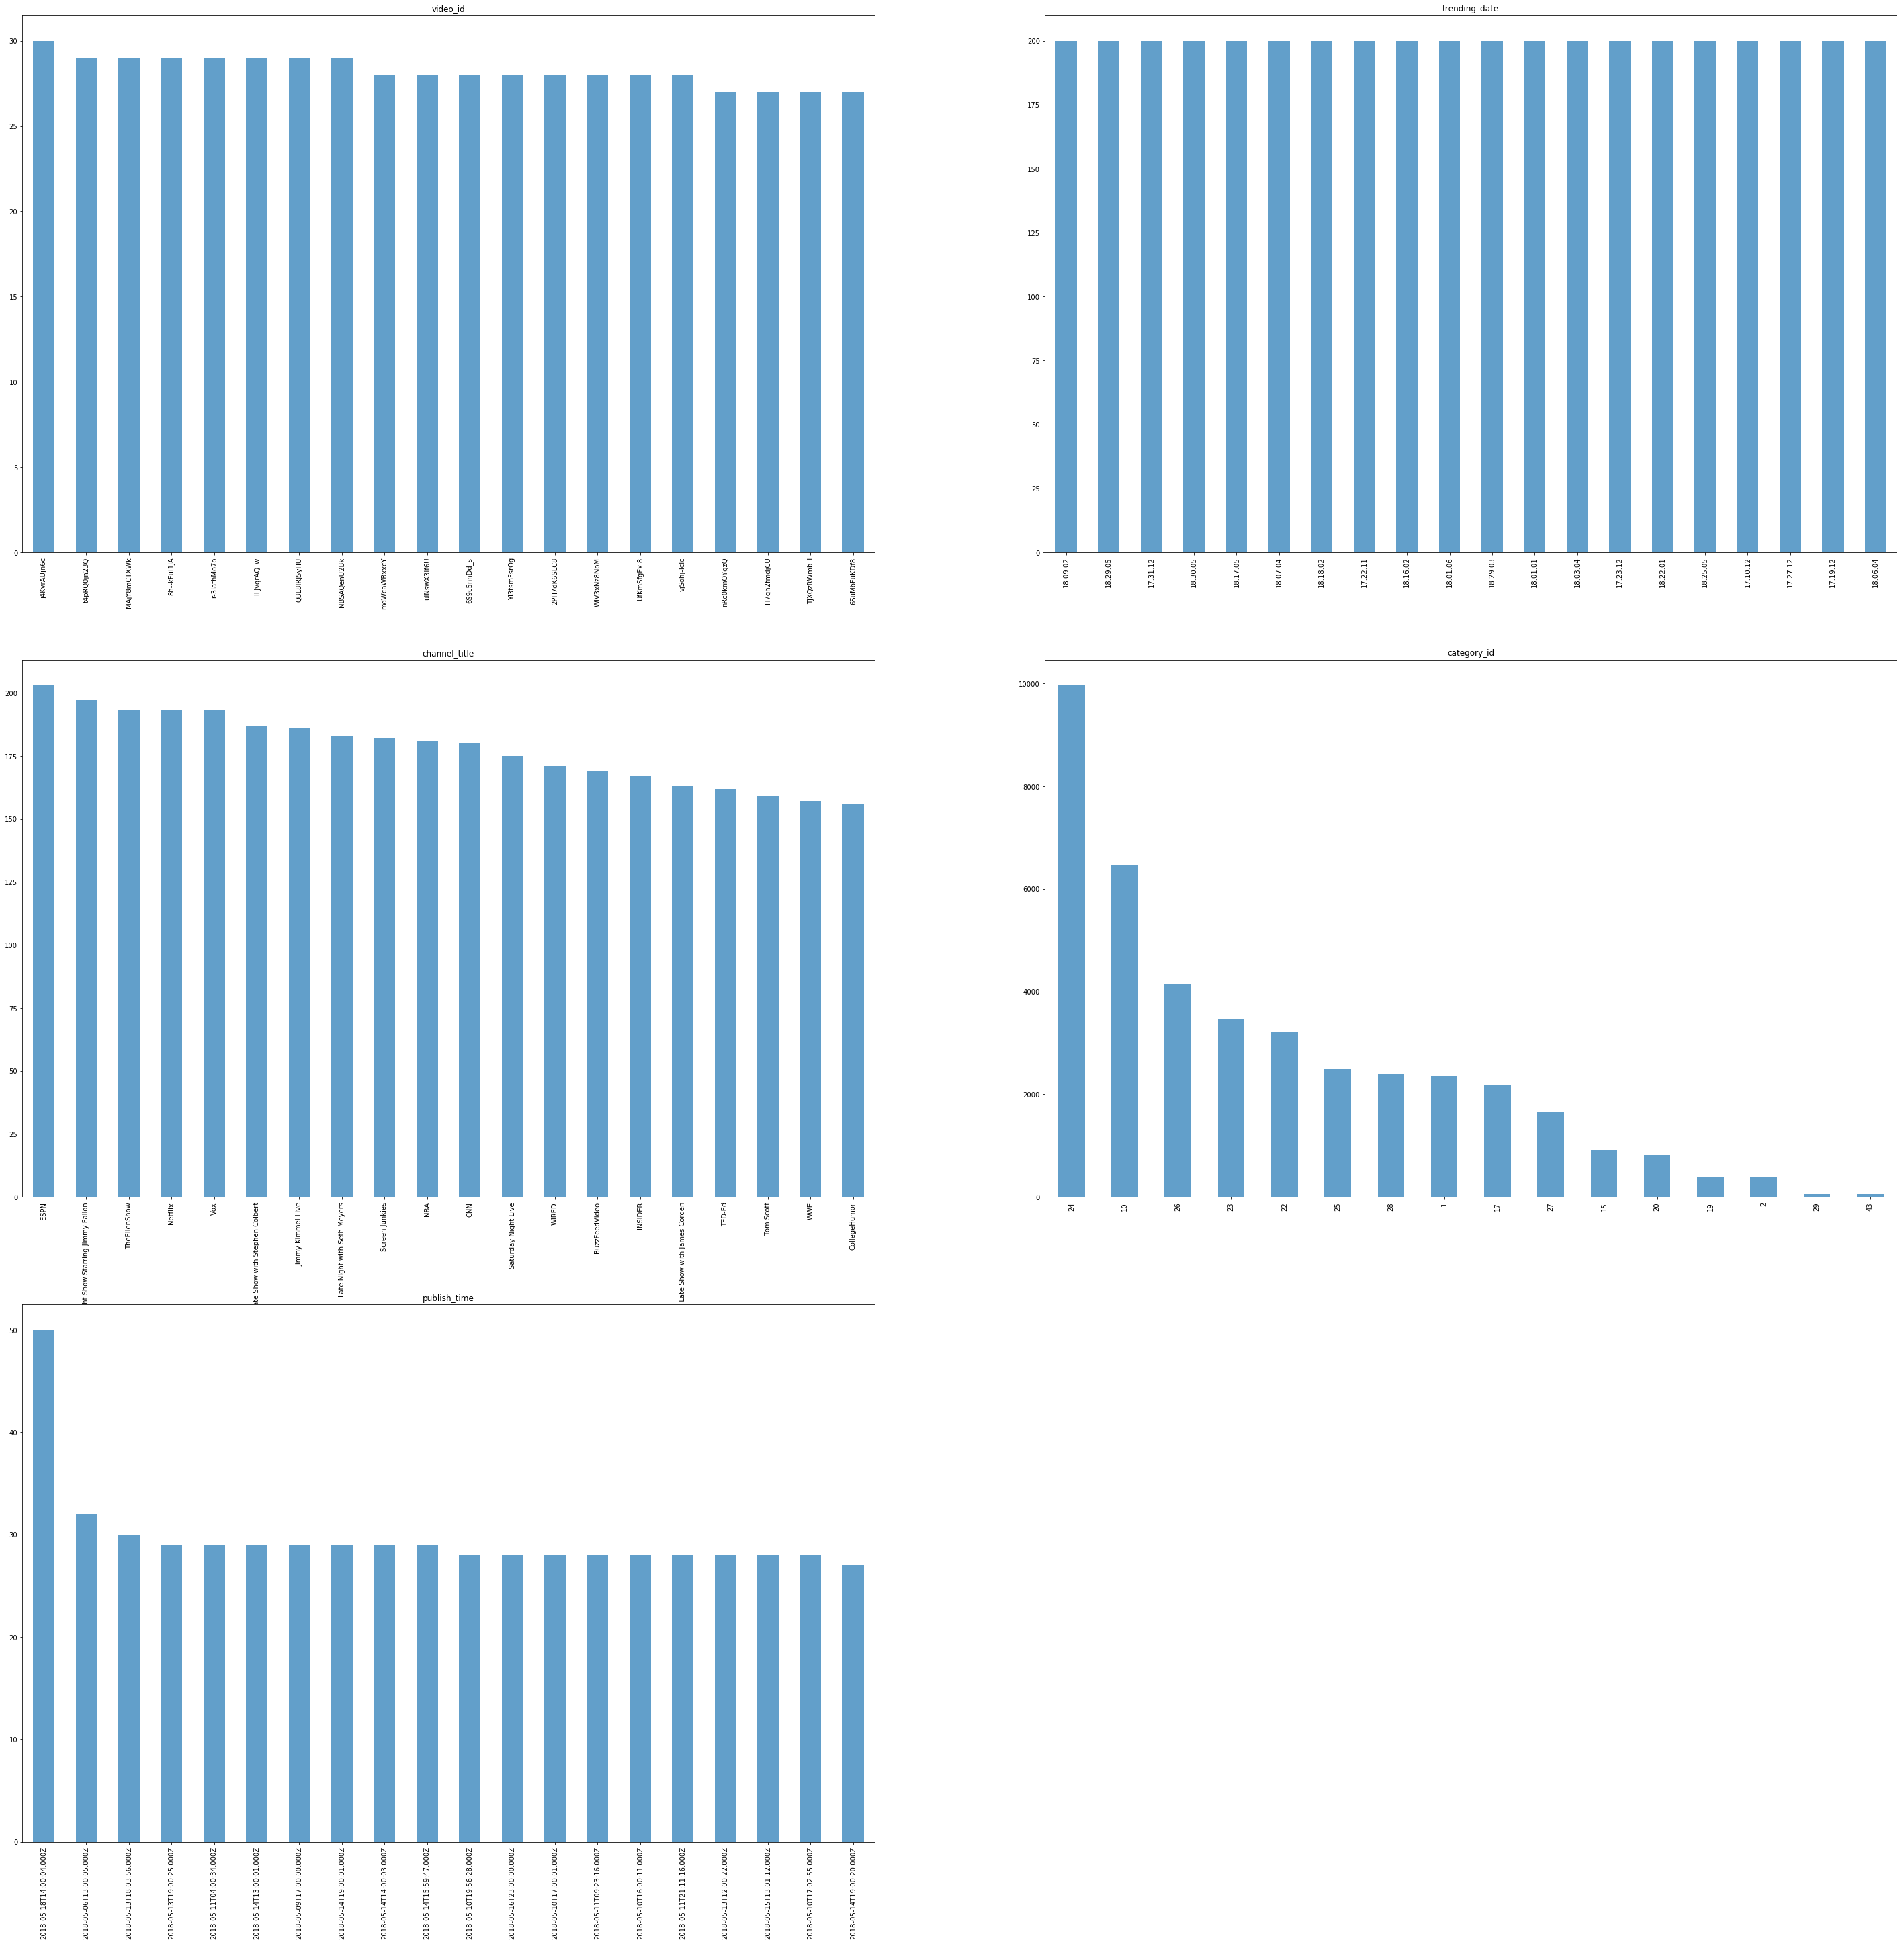

----------------------------------------------------------------------
在DEvideos数据中：


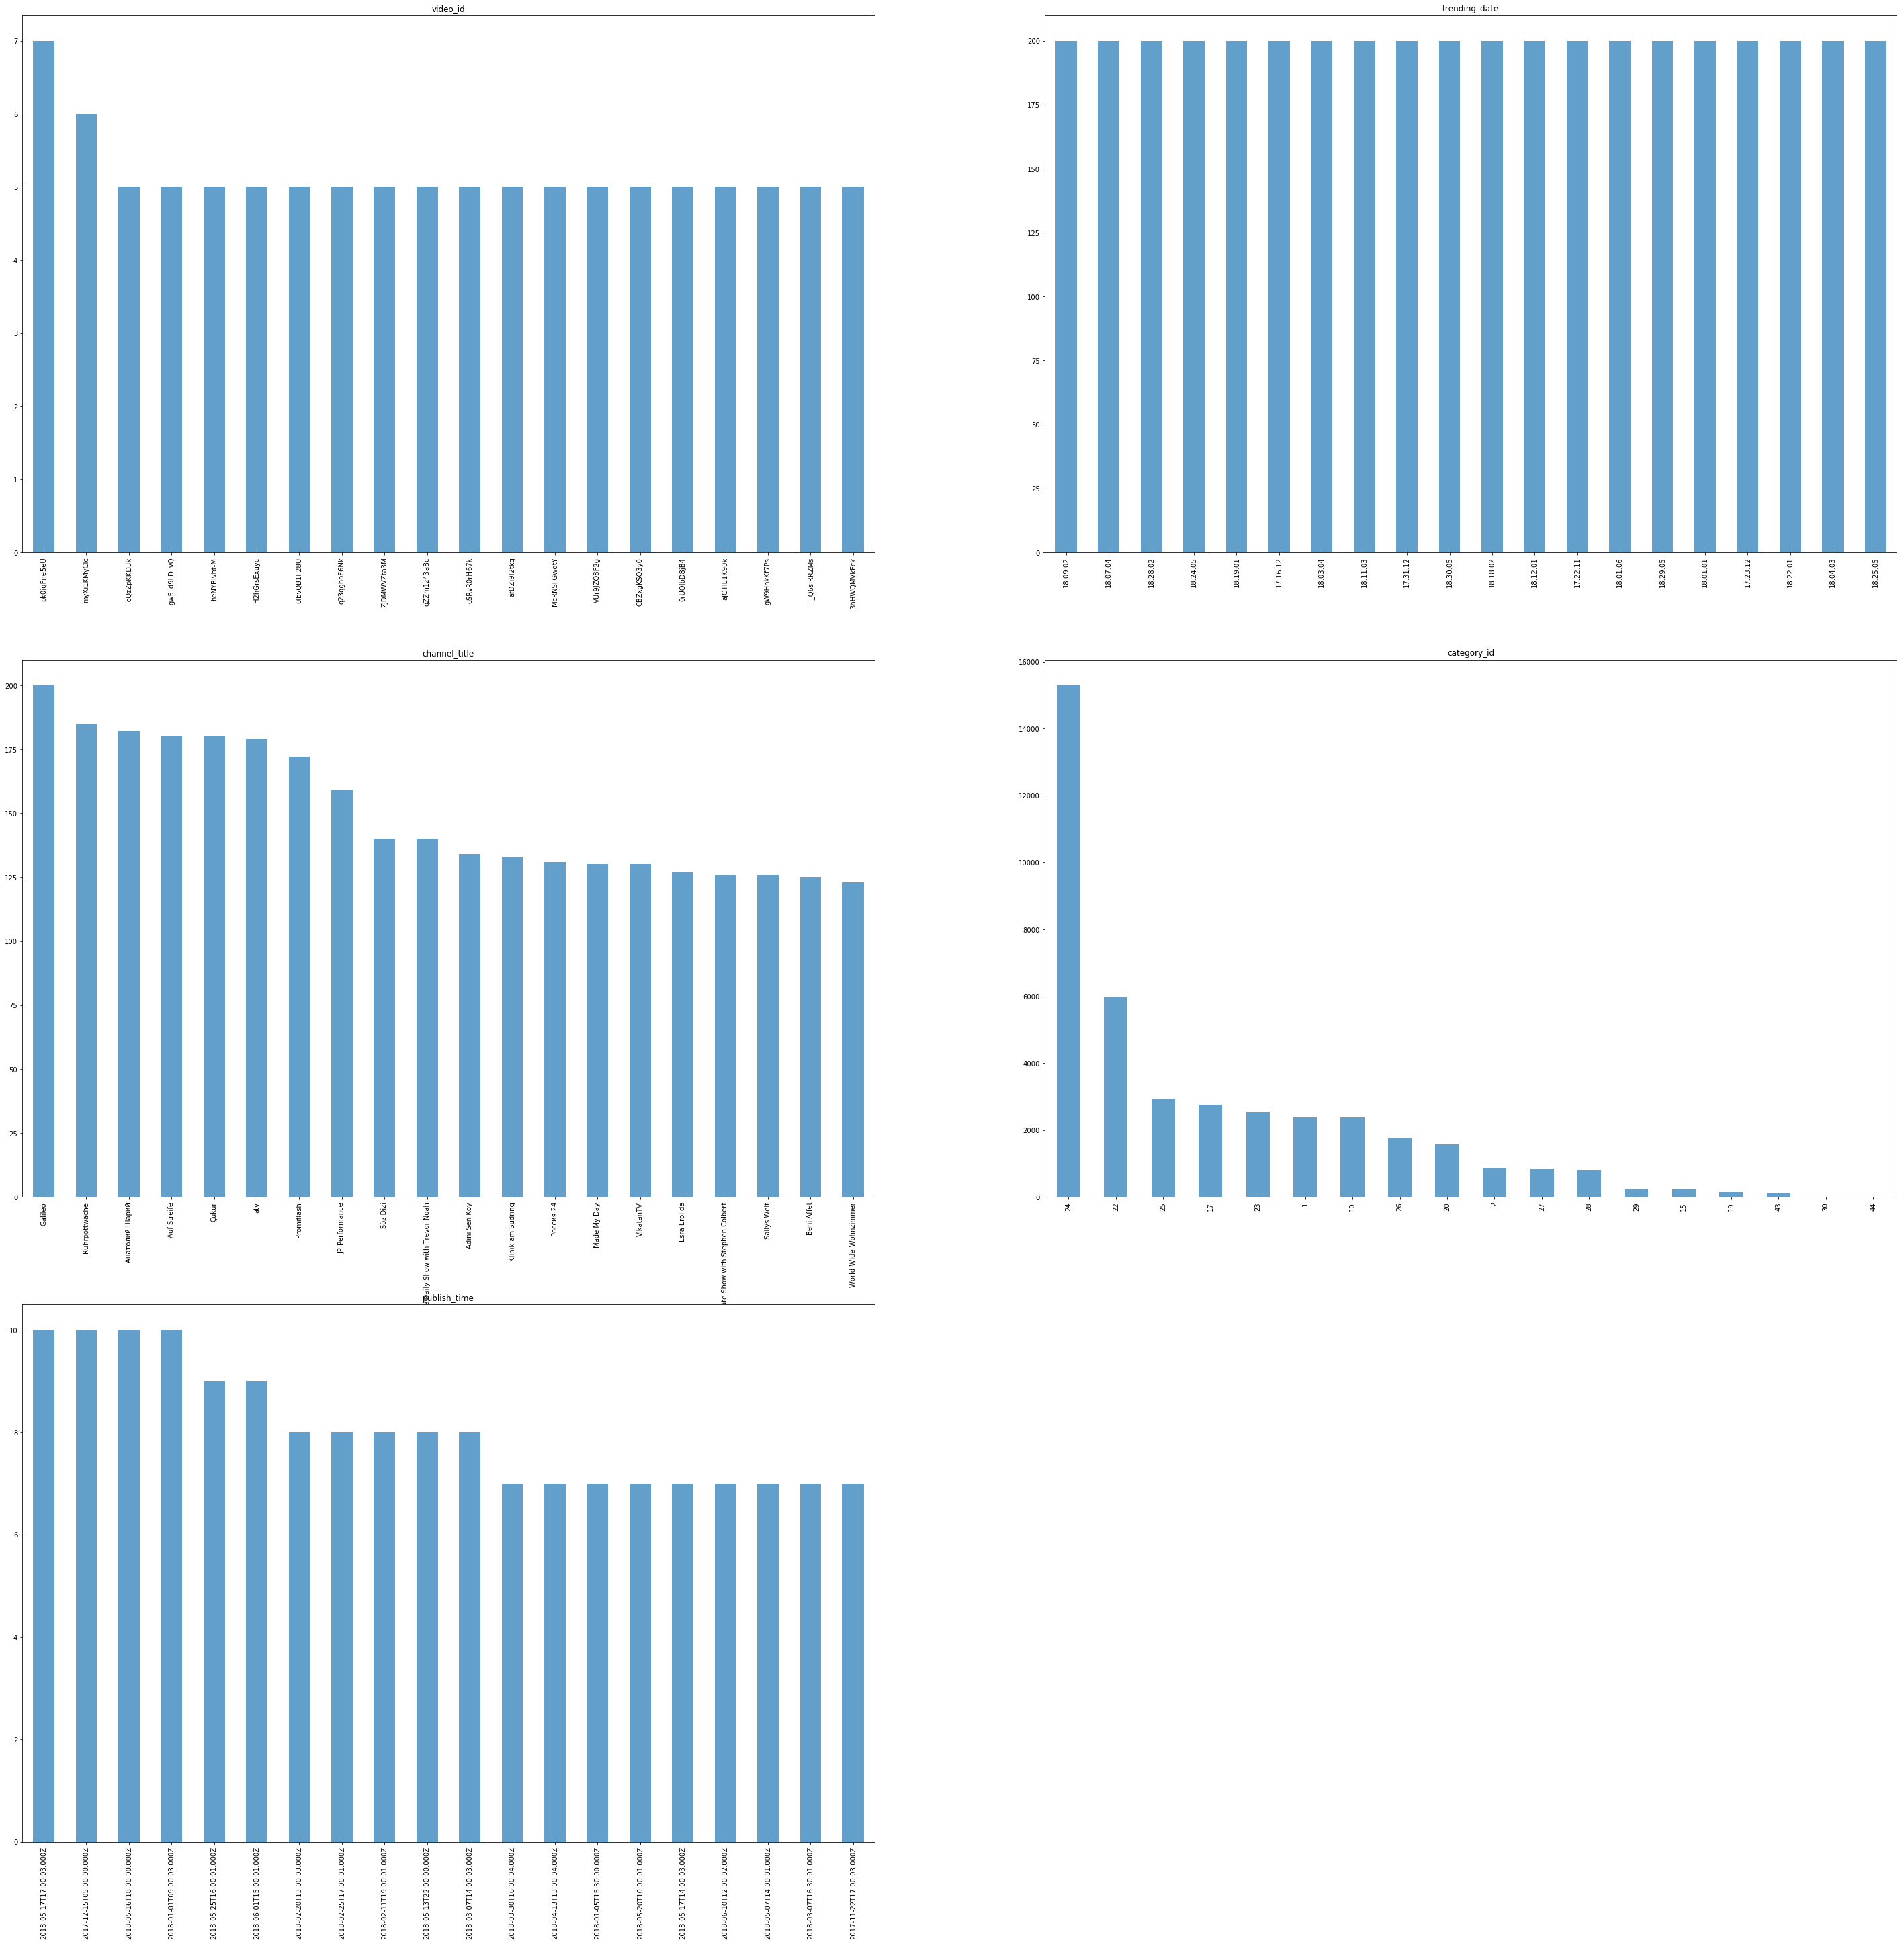

----------------------------------------------------------------------
在GBvideos数据中：


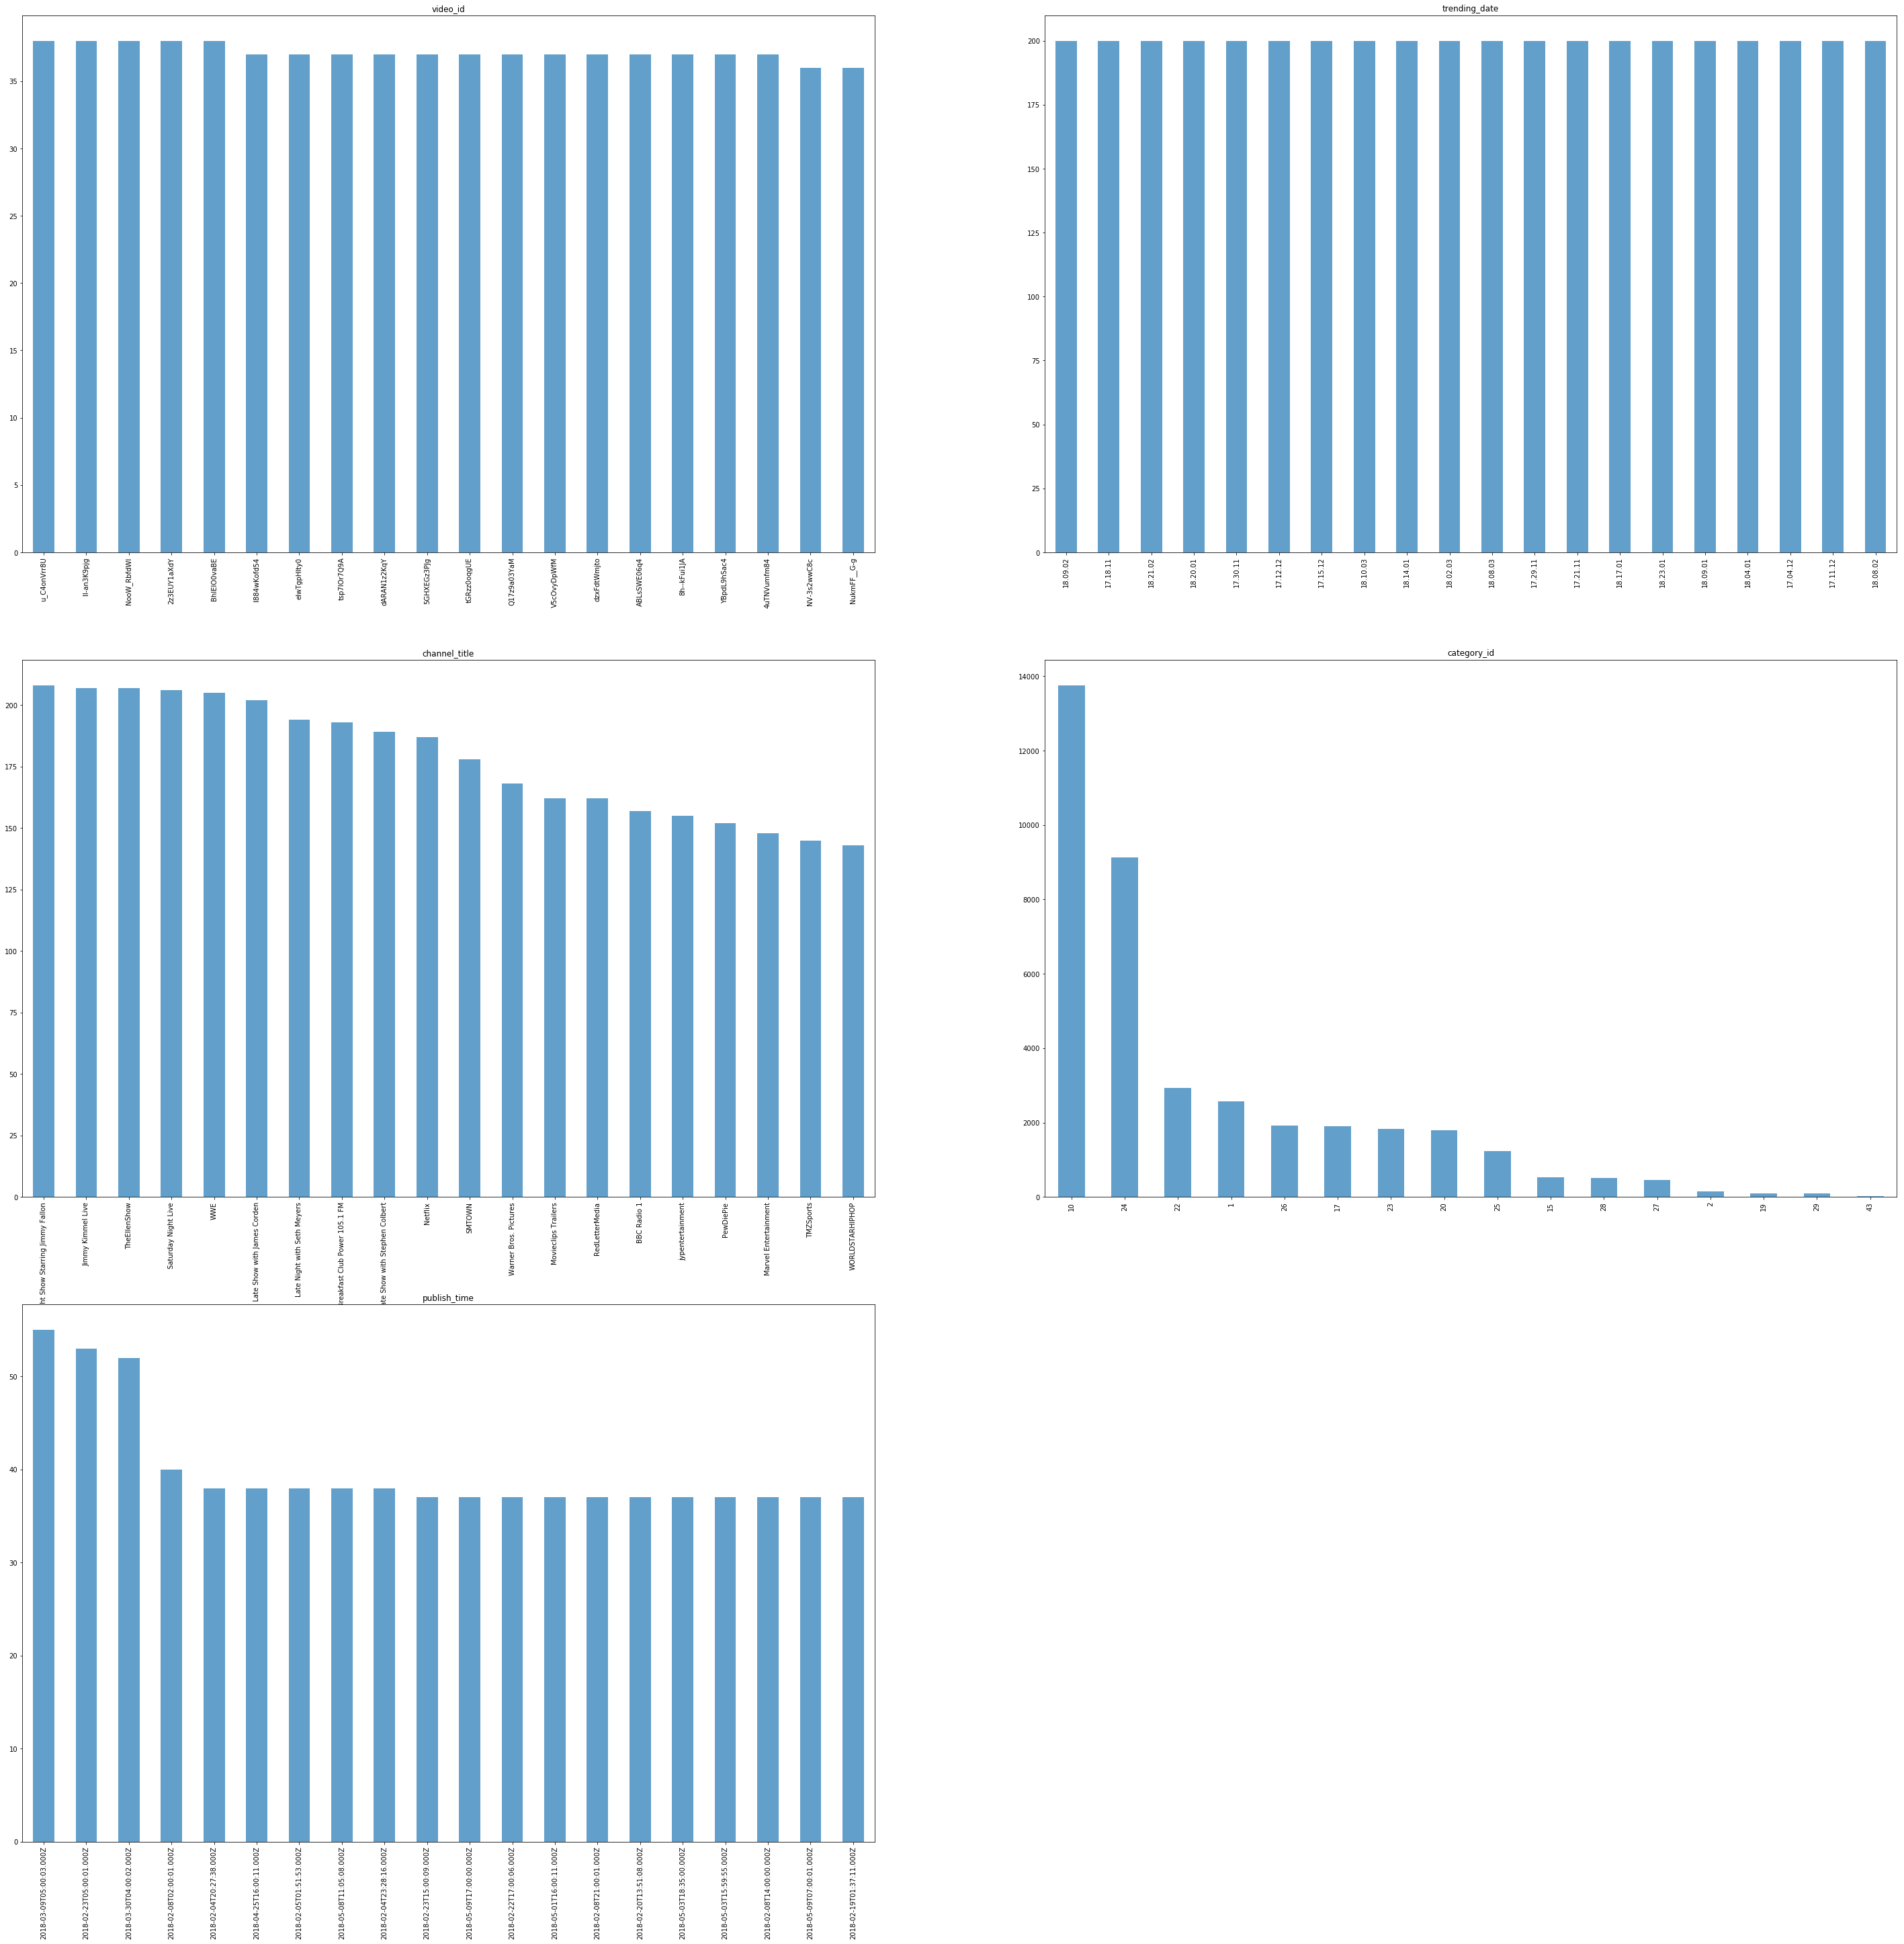

----------------------------------------------------------------------
在CAvideos数据中：


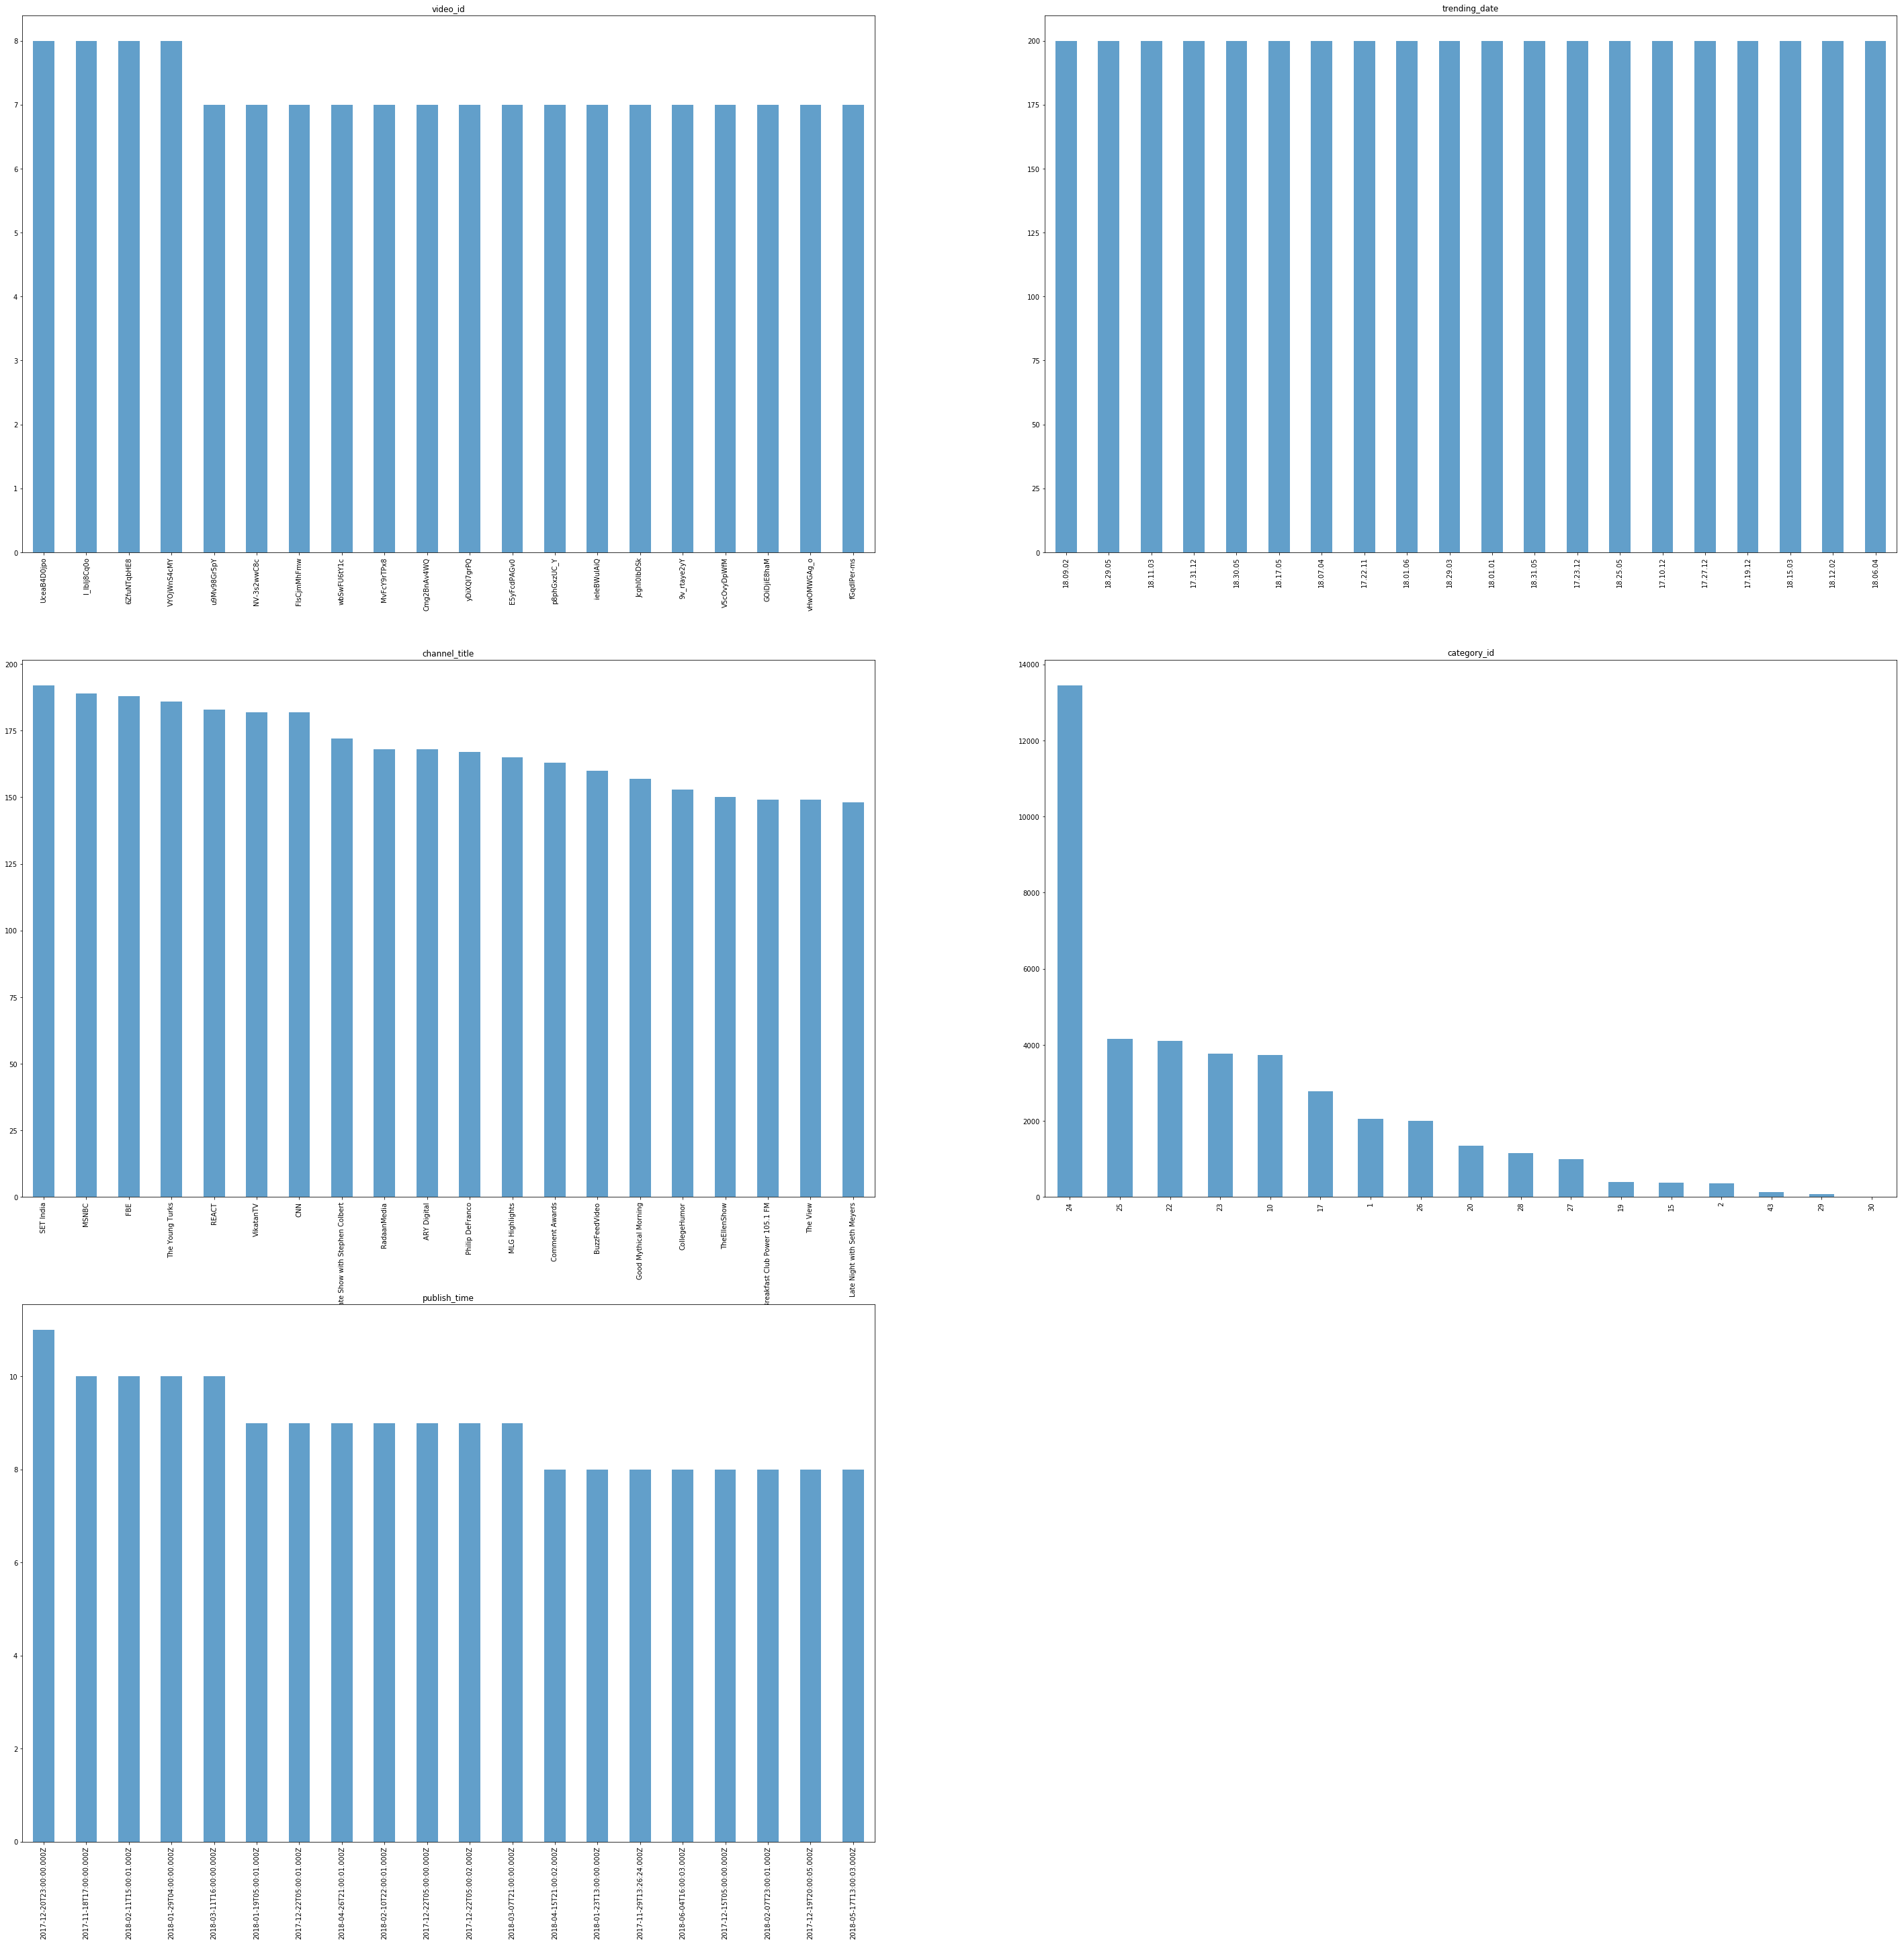

----------------------------------------------------------------------
在INvideos数据中：


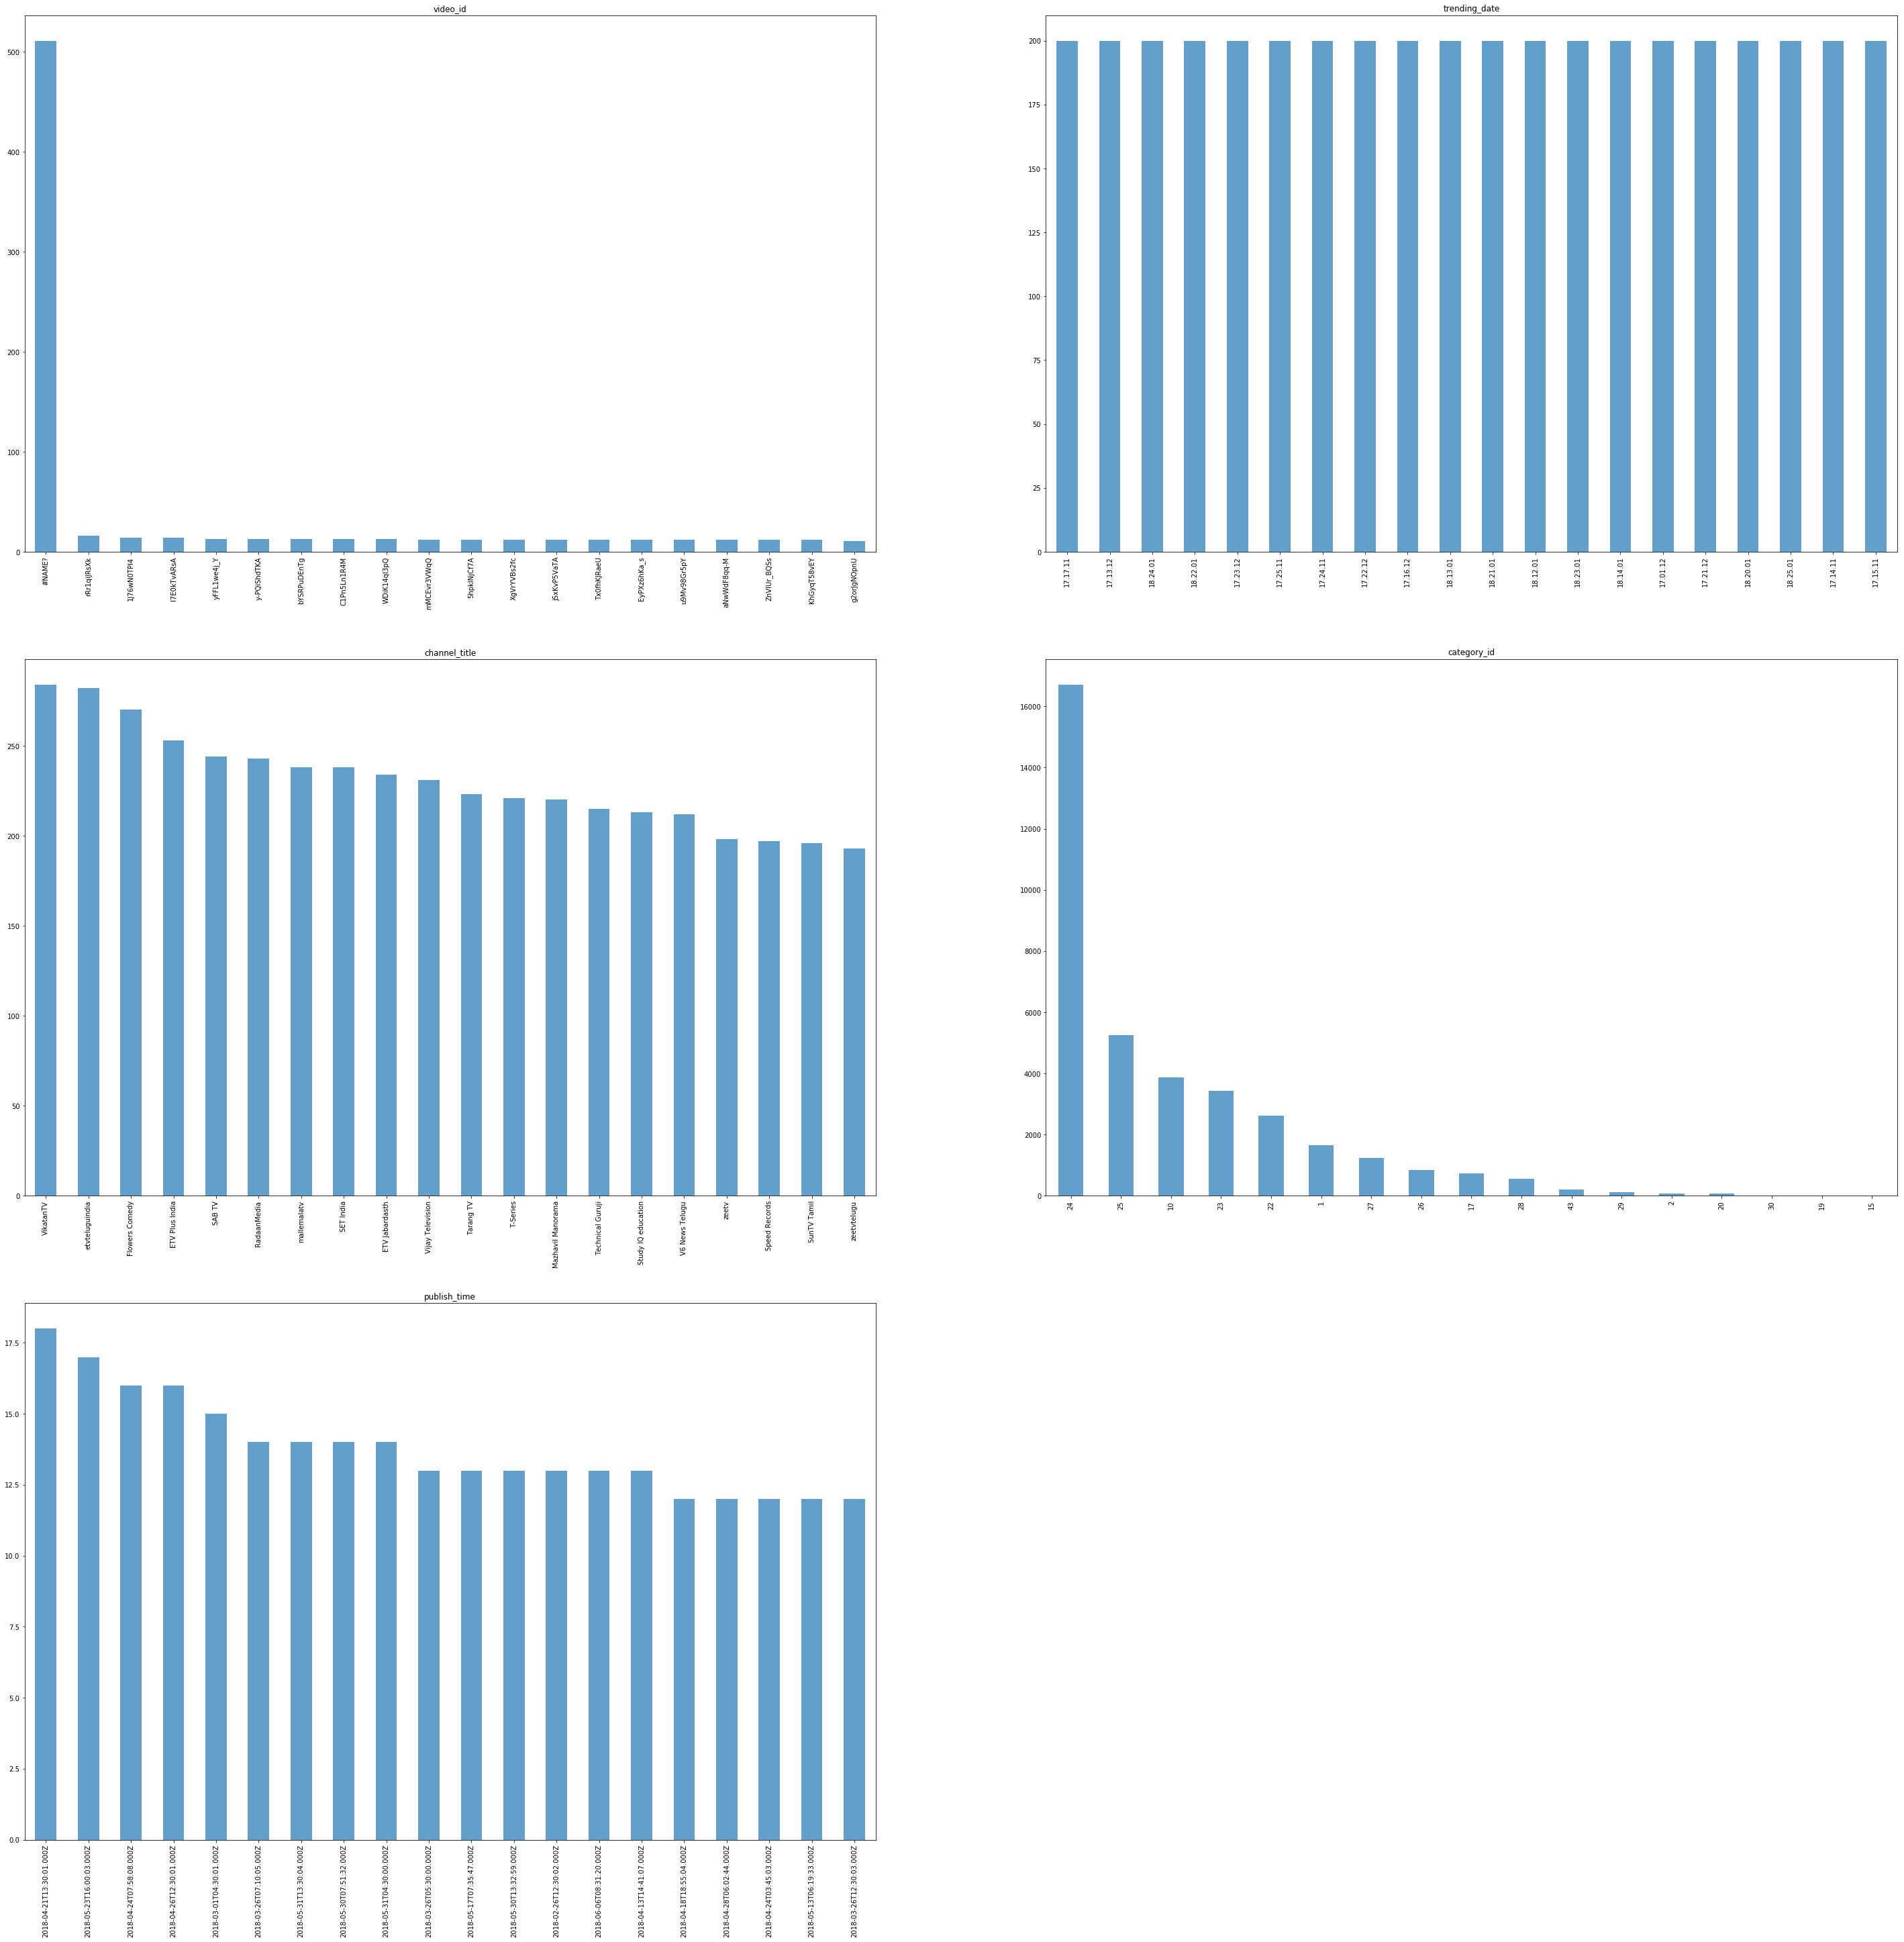

----------------------------------------------------------------------
在FRvideos数据中：


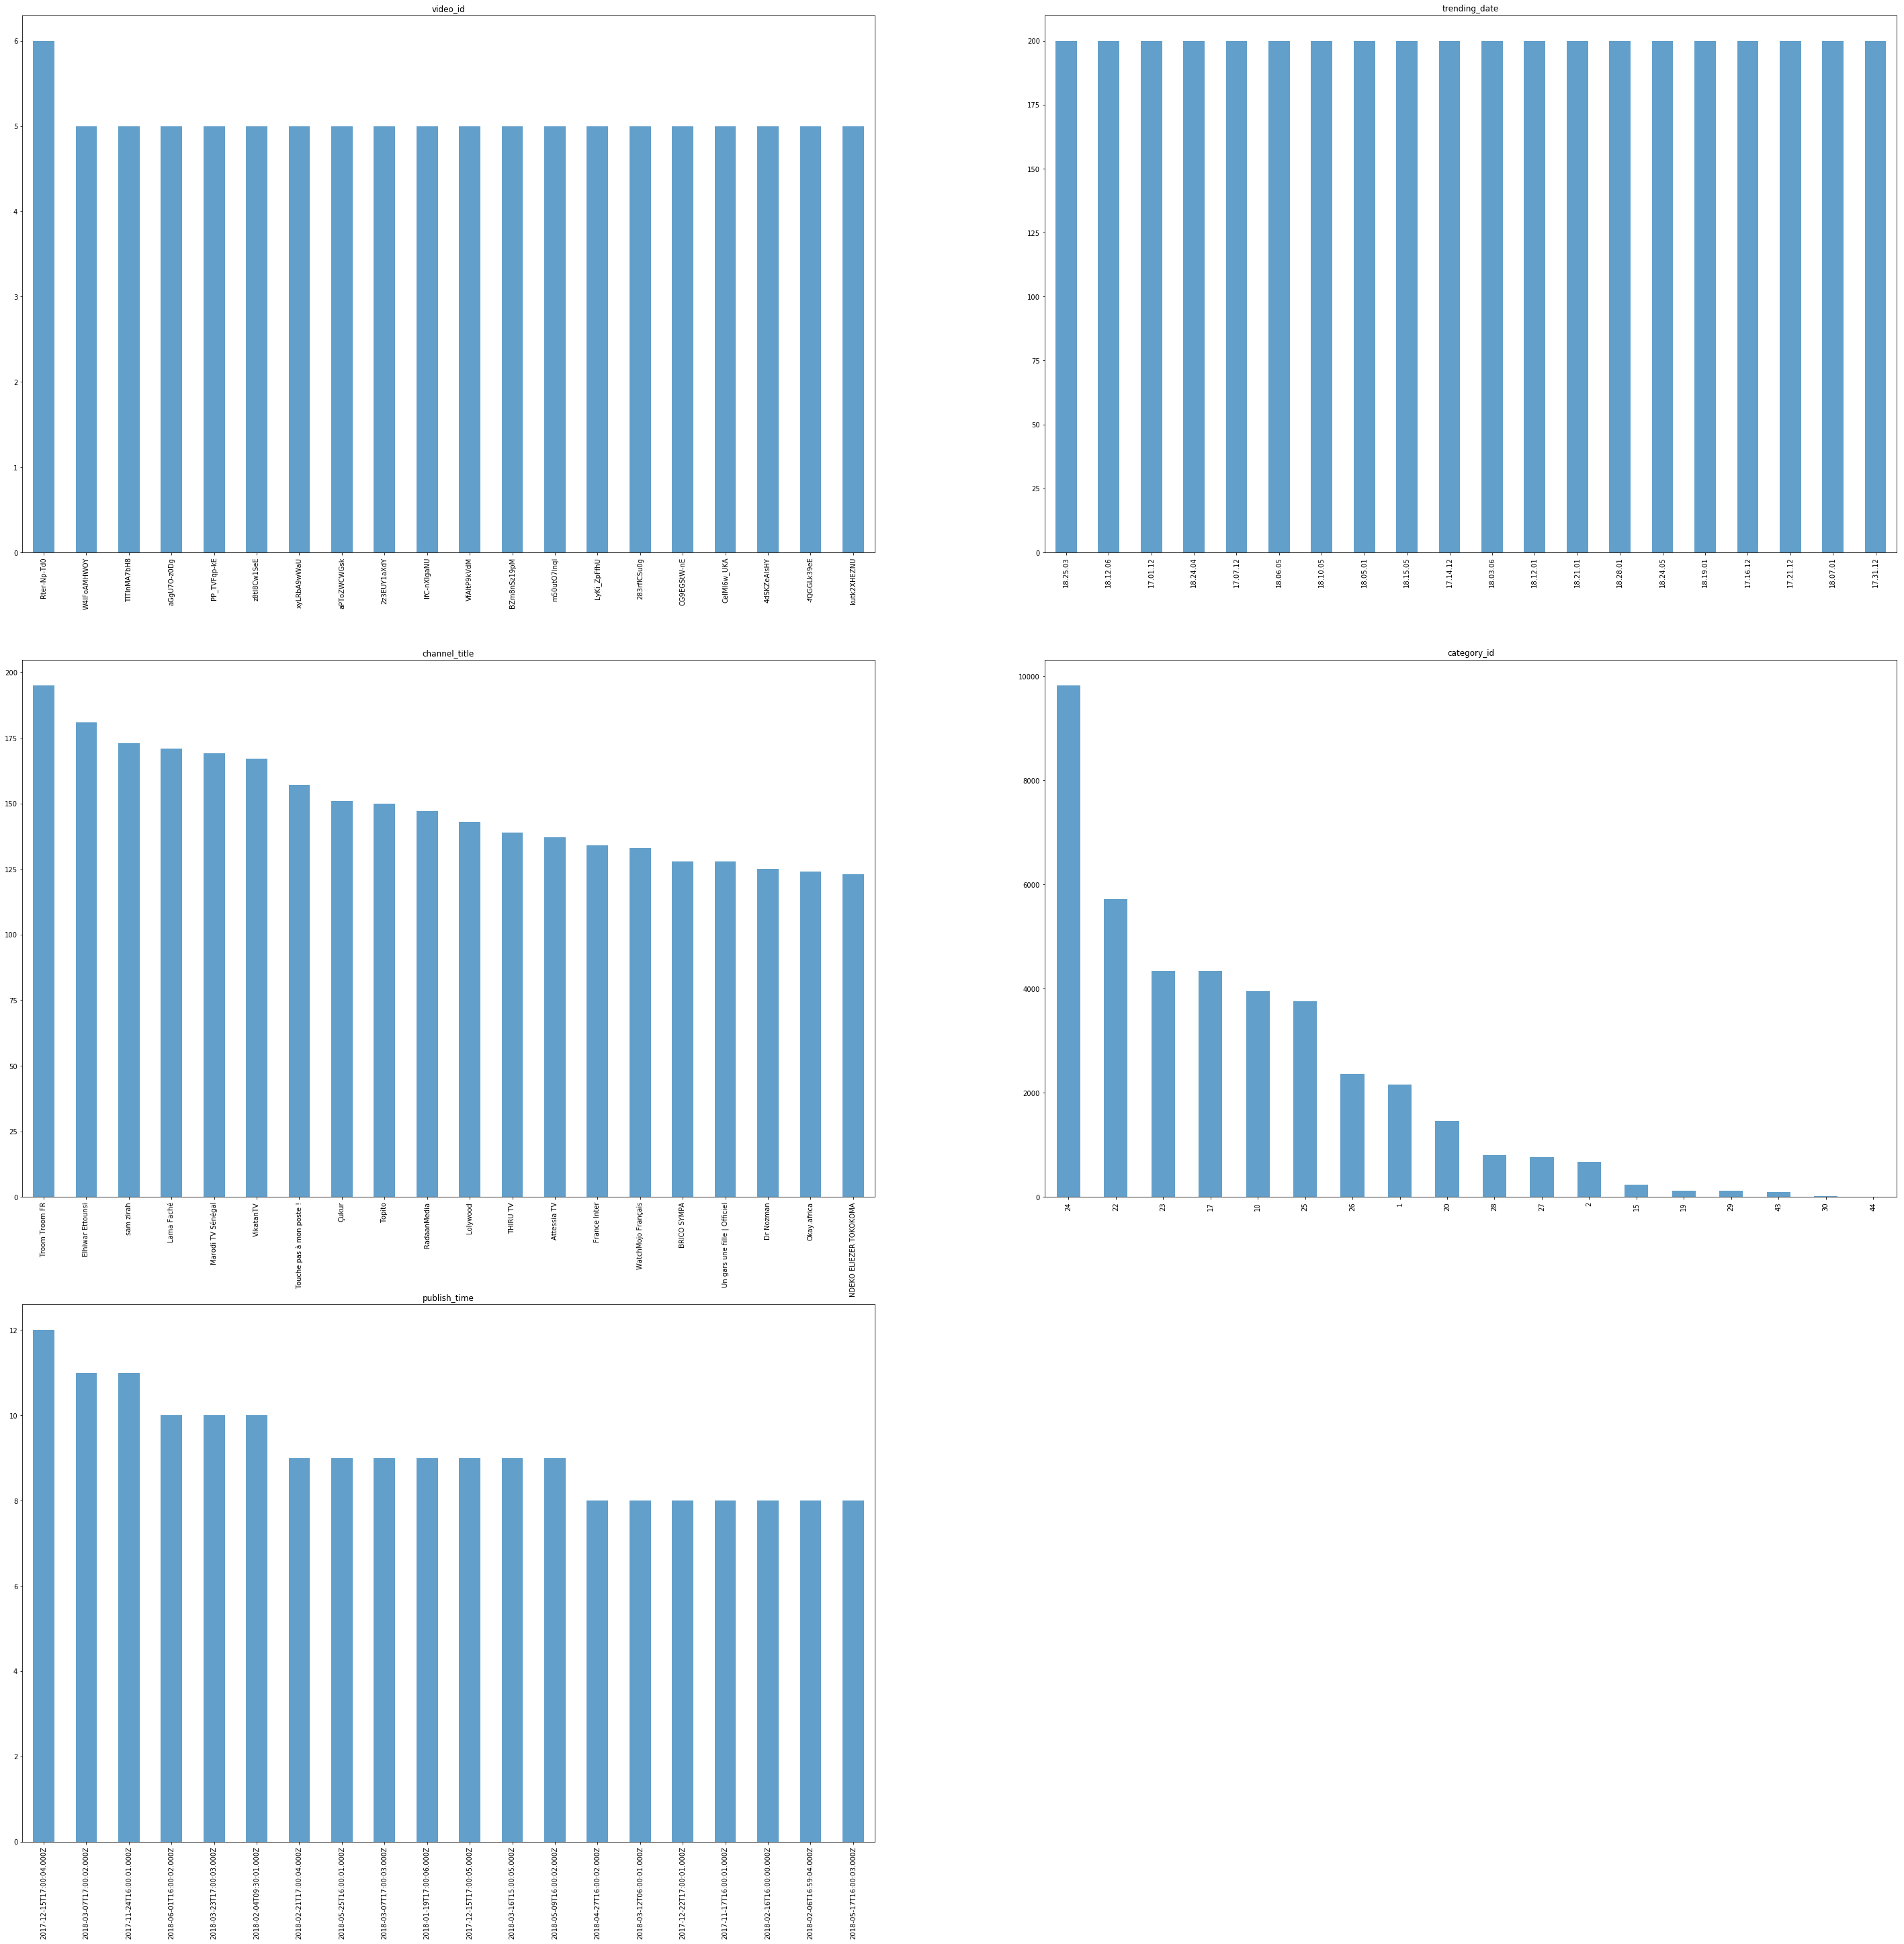

----------------------------------------------------------------------


In [7]:
# 函数调用
nominal_attributes_plt(file_path, nominal_attributes)

#### 2.2 数值属性

    数据摘要

In [8]:
# 查看数值属性五数概括
def get_numeric_attributes_five_num_sum(file_path, numeric_attributes):
    file_list = os.listdir(file_path)
    for file in file_list:
        df = pd.read_csv(file_path + file)
        print("在{}数据中：".format(file[:-4]))
        des = df[numeric_attributes].describe()
        for column in numeric_attributes:
            print("{}:".format(column))
            print("min:{}, Q1:{}, median:{}, Q3:{}, max:{}".format(des.loc['min', column], des.loc['25%', column], des.loc['50%', column], des.loc['75%', column], des.loc['max', column]))
        print(70 * '-')

In [9]:
# 函数调用
get_numeric_attributes_five_num_sum(file_path, numeric_attributes)

在USvideos数据中：
views:
min:549.0, Q1:242329.0, median:681861.0, Q3:1823157.0, max:225211923.0
likes:
min:0.0, Q1:5424.0, median:18091.0, Q3:55417.0, max:5613827.0
dislikes:
min:0.0, Q1:202.0, median:631.0, Q3:1938.0, max:1674420.0
comment_count:
min:0.0, Q1:614.0, median:1856.0, Q3:5755.0, max:1361580.0
----------------------------------------------------------------------
在DEvideos数据中：
views:
min:518.0, Q1:27068.75, median:119277.0, Q3:443101.5, max:113876217.0
likes:
min:0.0, Q1:533.0, median:2699.0, Q3:11796.25, max:4924056.0
dislikes:
min:0.0, Q1:29.0, median:134.0, Q3:532.0, max:1470386.0
comment_count:
min:0.0, Q1:79.0, median:376.0, Q3:1376.0, max:1084435.0
----------------------------------------------------------------------
在GBvideos数据中：
views:
min:851.0, Q1:251527.25, median:981889.0, Q3:3683628.5, max:424538912.0
likes:
min:0.0, Q1:5897.0, median:25182.5, Q3:114089.25, max:5613827.0
dislikes:
min:0.0, Q1:200.0, median:821.0, Q3:3357.5, max:1944971.0
comment_count:
min:0.0, Q1

In [10]:
# 查看数值属性缺失值个数
def get_numeric_attributes_nan(file_path, numeric_attributes):
    file_list = os.listdir(file_path)
    for file in file_list:
        df = pd.read_csv(file_path + file)
        print("在{}数据中：".format(file[:-4]))
        for column in numeric_attributes:
            print("{} 缺失值个数为：{}".format(column, df[column].isnull().sum()))
        print(50 * '-')

In [11]:
# 函数调用
get_numeric_attributes_nan(file_path, numeric_attributes)

在USvideos数据中：
views 缺失值个数为：0
likes 缺失值个数为：0
dislikes 缺失值个数为：0
comment_count 缺失值个数为：0
--------------------------------------------------
在DEvideos数据中：
views 缺失值个数为：0
likes 缺失值个数为：0
dislikes 缺失值个数为：0
comment_count 缺失值个数为：0
--------------------------------------------------
在GBvideos数据中：
views 缺失值个数为：0
likes 缺失值个数为：0
dislikes 缺失值个数为：0
comment_count 缺失值个数为：0
--------------------------------------------------
在CAvideos数据中：
views 缺失值个数为：0
likes 缺失值个数为：0
dislikes 缺失值个数为：0
comment_count 缺失值个数为：0
--------------------------------------------------
在INvideos数据中：
views 缺失值个数为：0
likes 缺失值个数为：0
dislikes 缺失值个数为：0
comment_count 缺失值个数为：0
--------------------------------------------------
在FRvideos数据中：
views 缺失值个数为：0
likes 缺失值个数为：0
dislikes 缺失值个数为：0
comment_count 缺失值个数为：0
--------------------------------------------------


    数据可视化

In [12]:
# 数据可视化方法：直方图
def numeric_attributes_hist(file_path, numeric_attributes, figsize=(30, 20)):
    file_list = os.listdir(file_path)
    for file in file_list:
        df = pd.read_csv(file_path + file)
        print("在{}数据中：".format(file[:-4]))
        for i, column in enumerate(numeric_attributes):
            bins, alpha = 200, 0.8
            plt.subplot(2, 2, i + 1)
            df[column].plot.hist(title=column, figsize=figsize, bins=bins, alpha=alpha)
        plt.show()

在USvideos数据中：


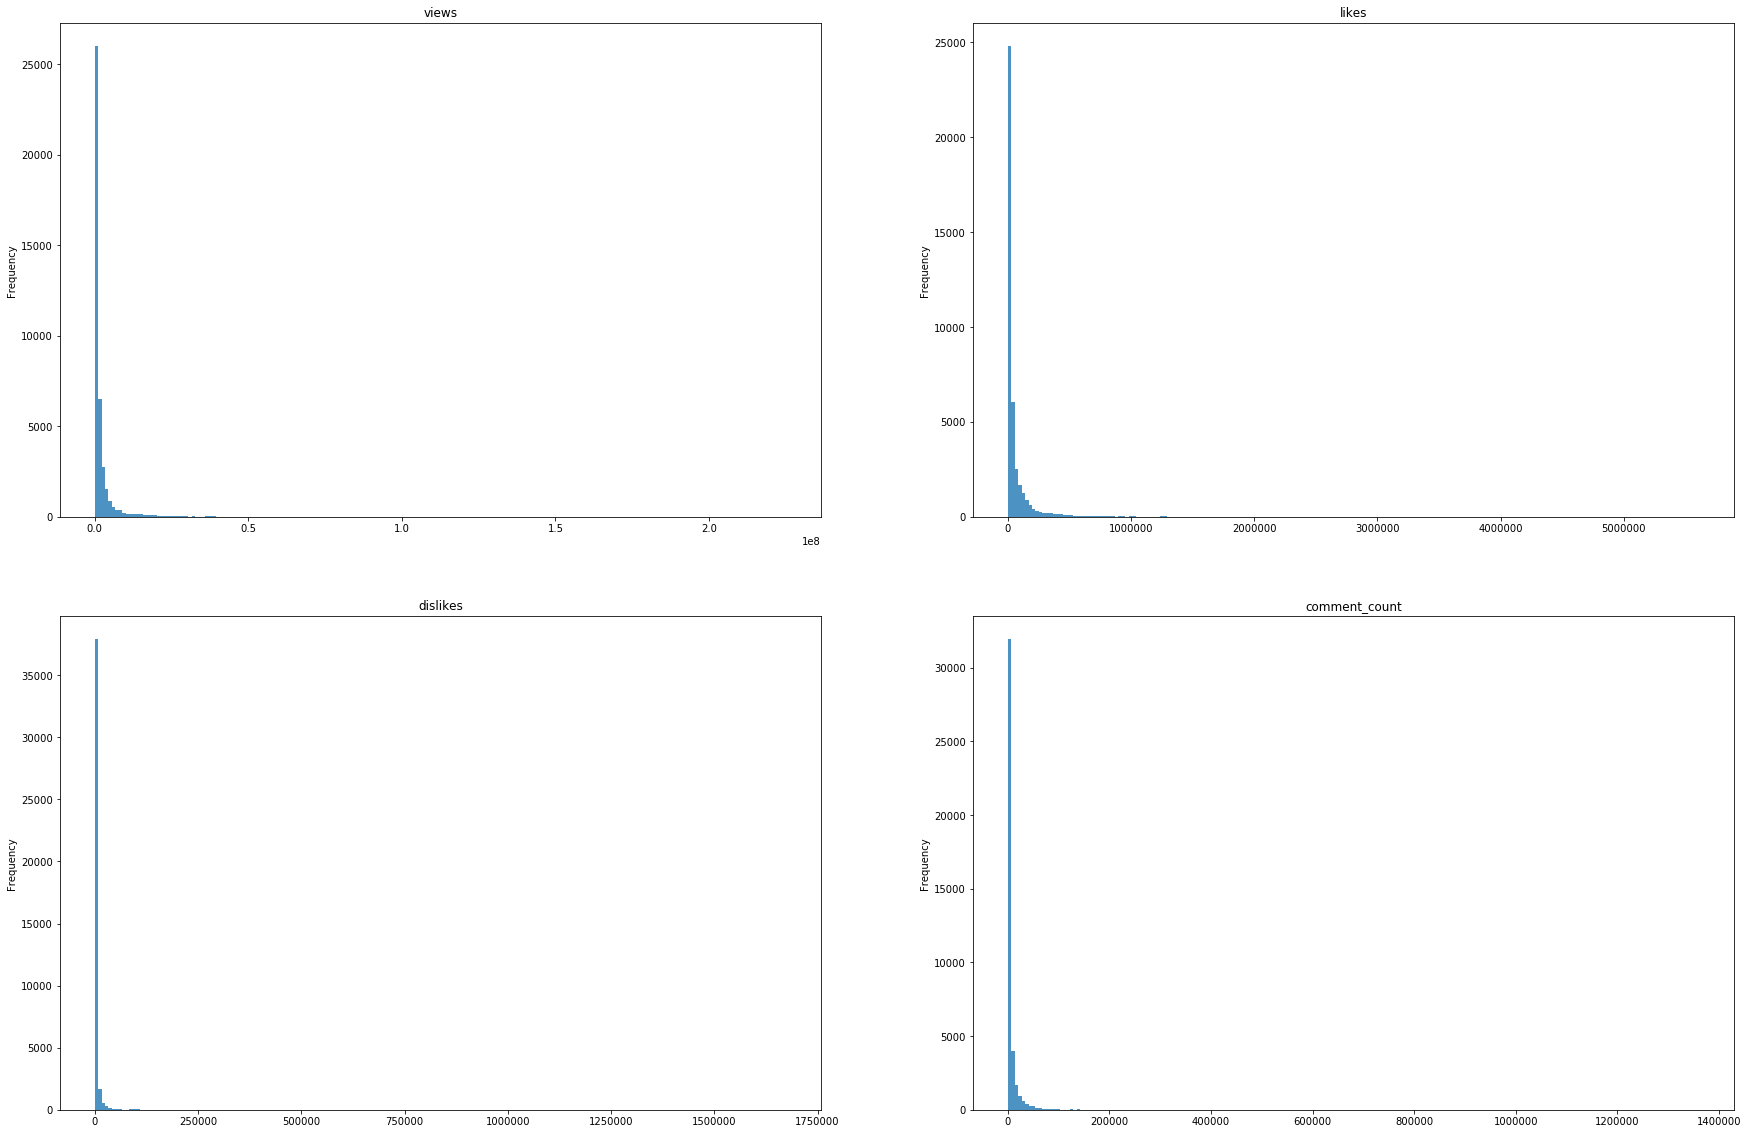

在DEvideos数据中：


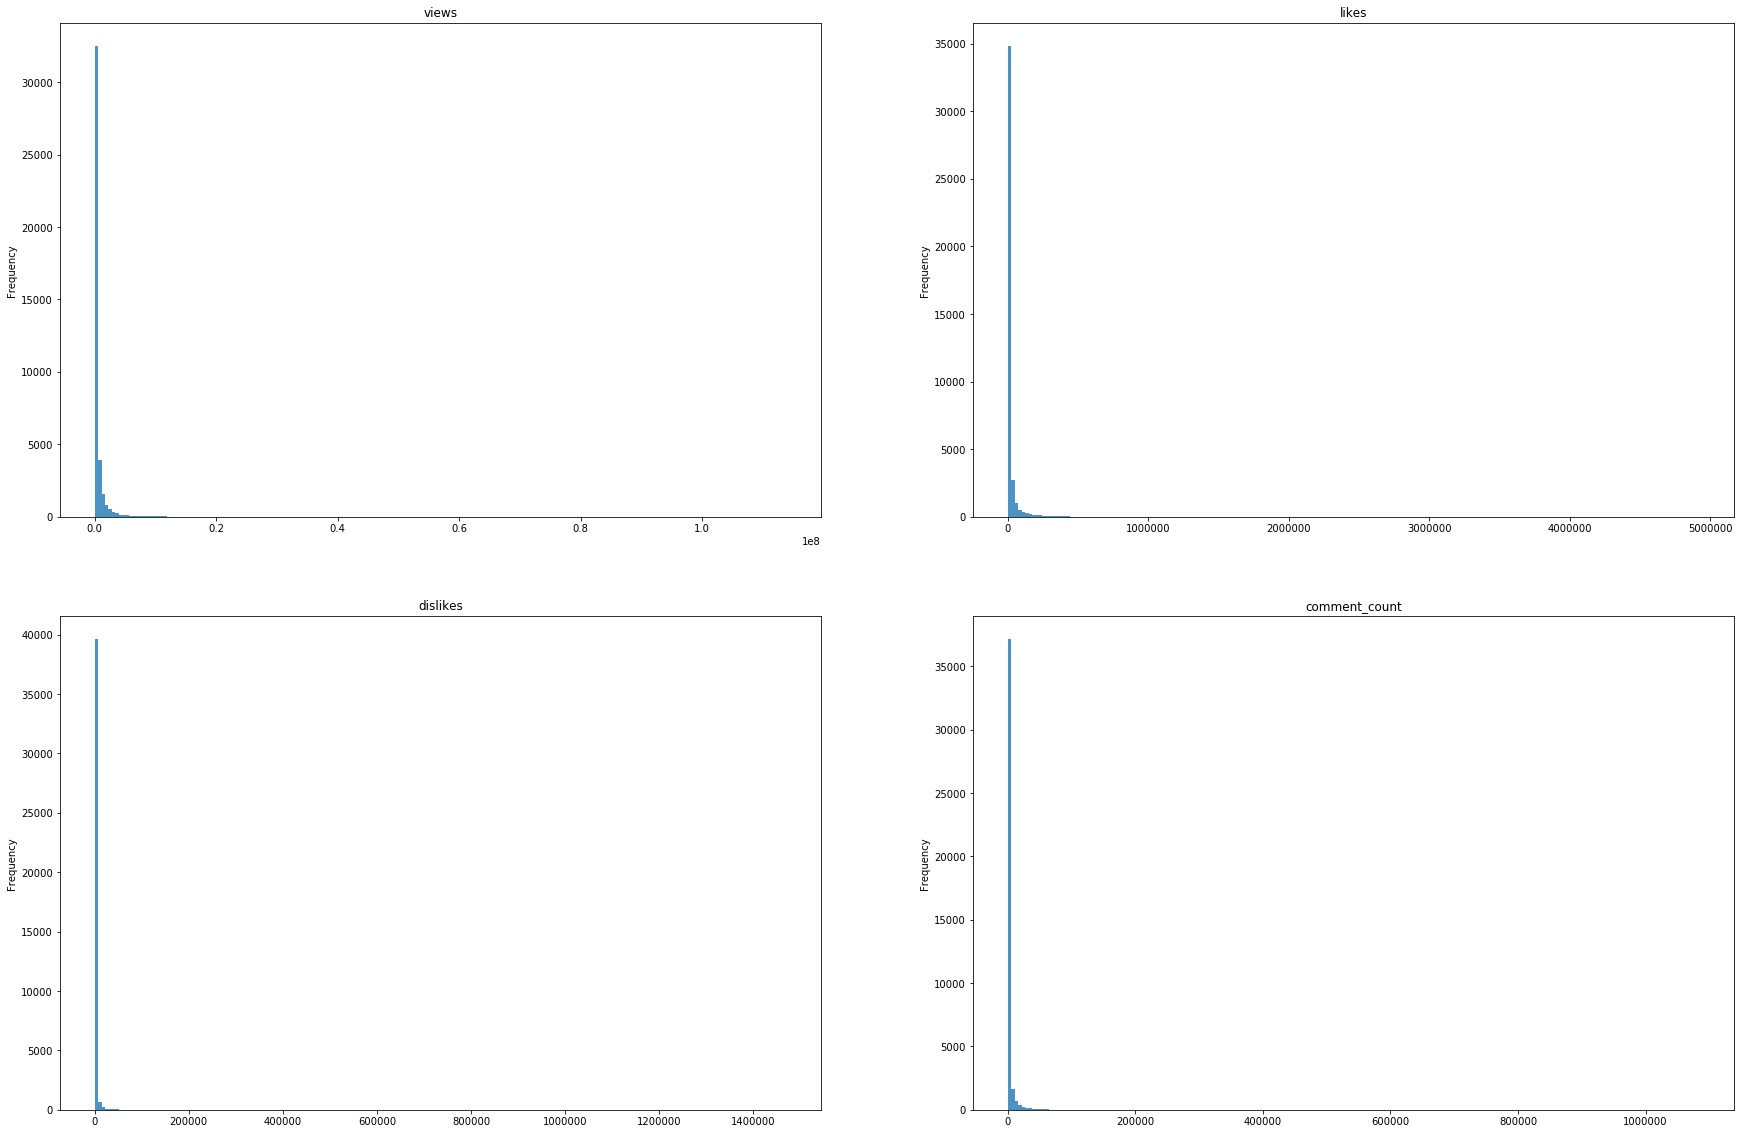

在GBvideos数据中：


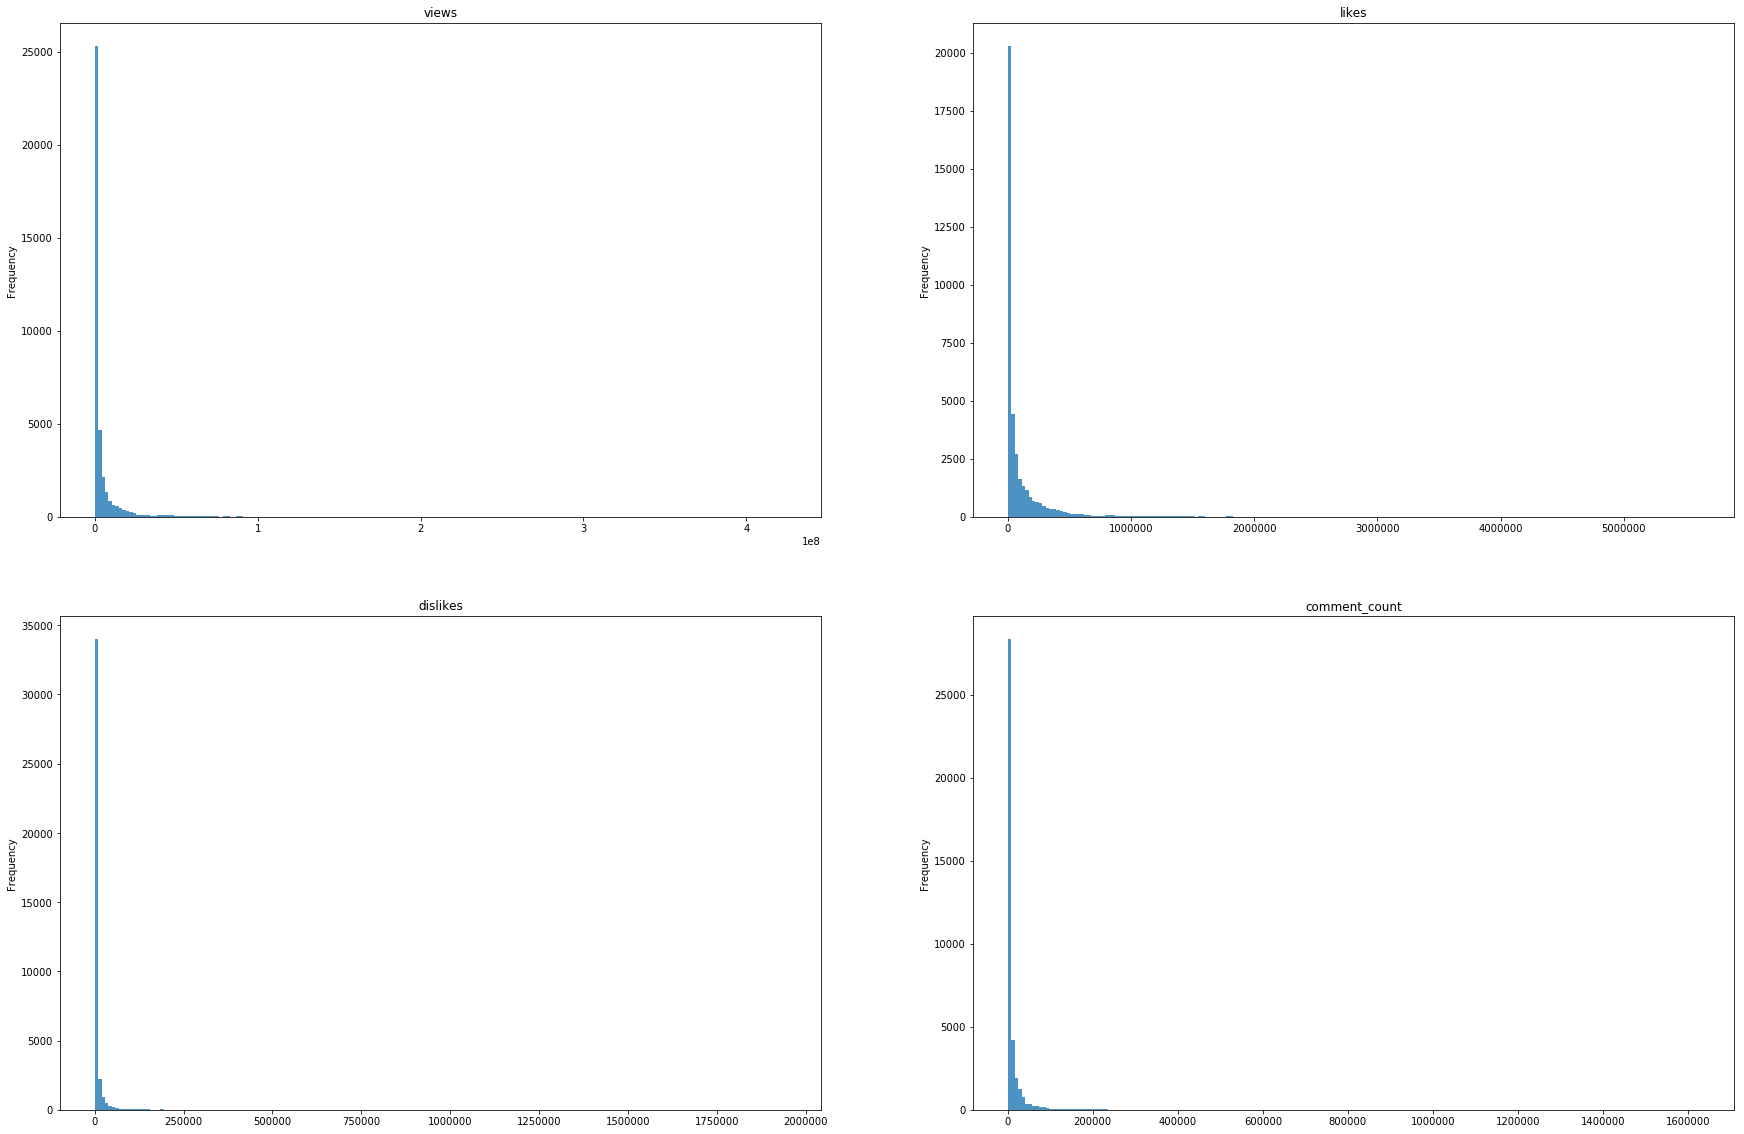

在CAvideos数据中：


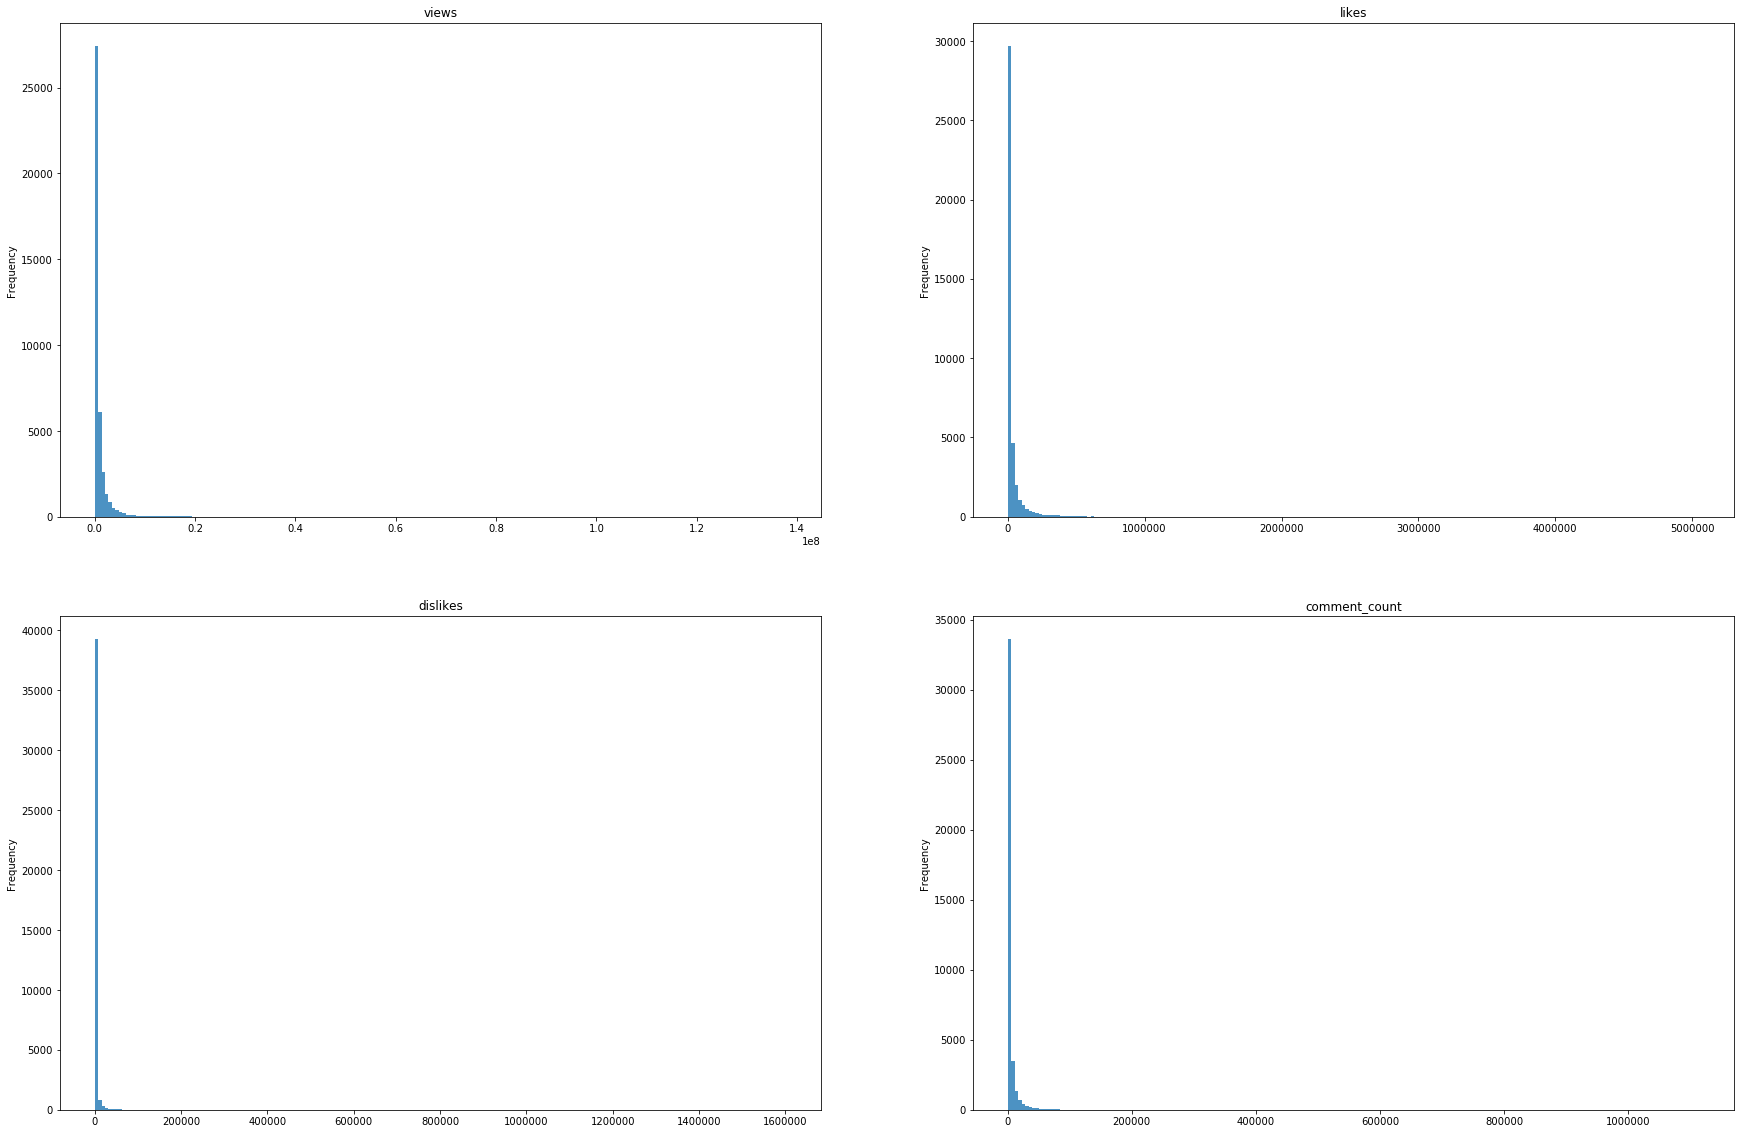

在INvideos数据中：


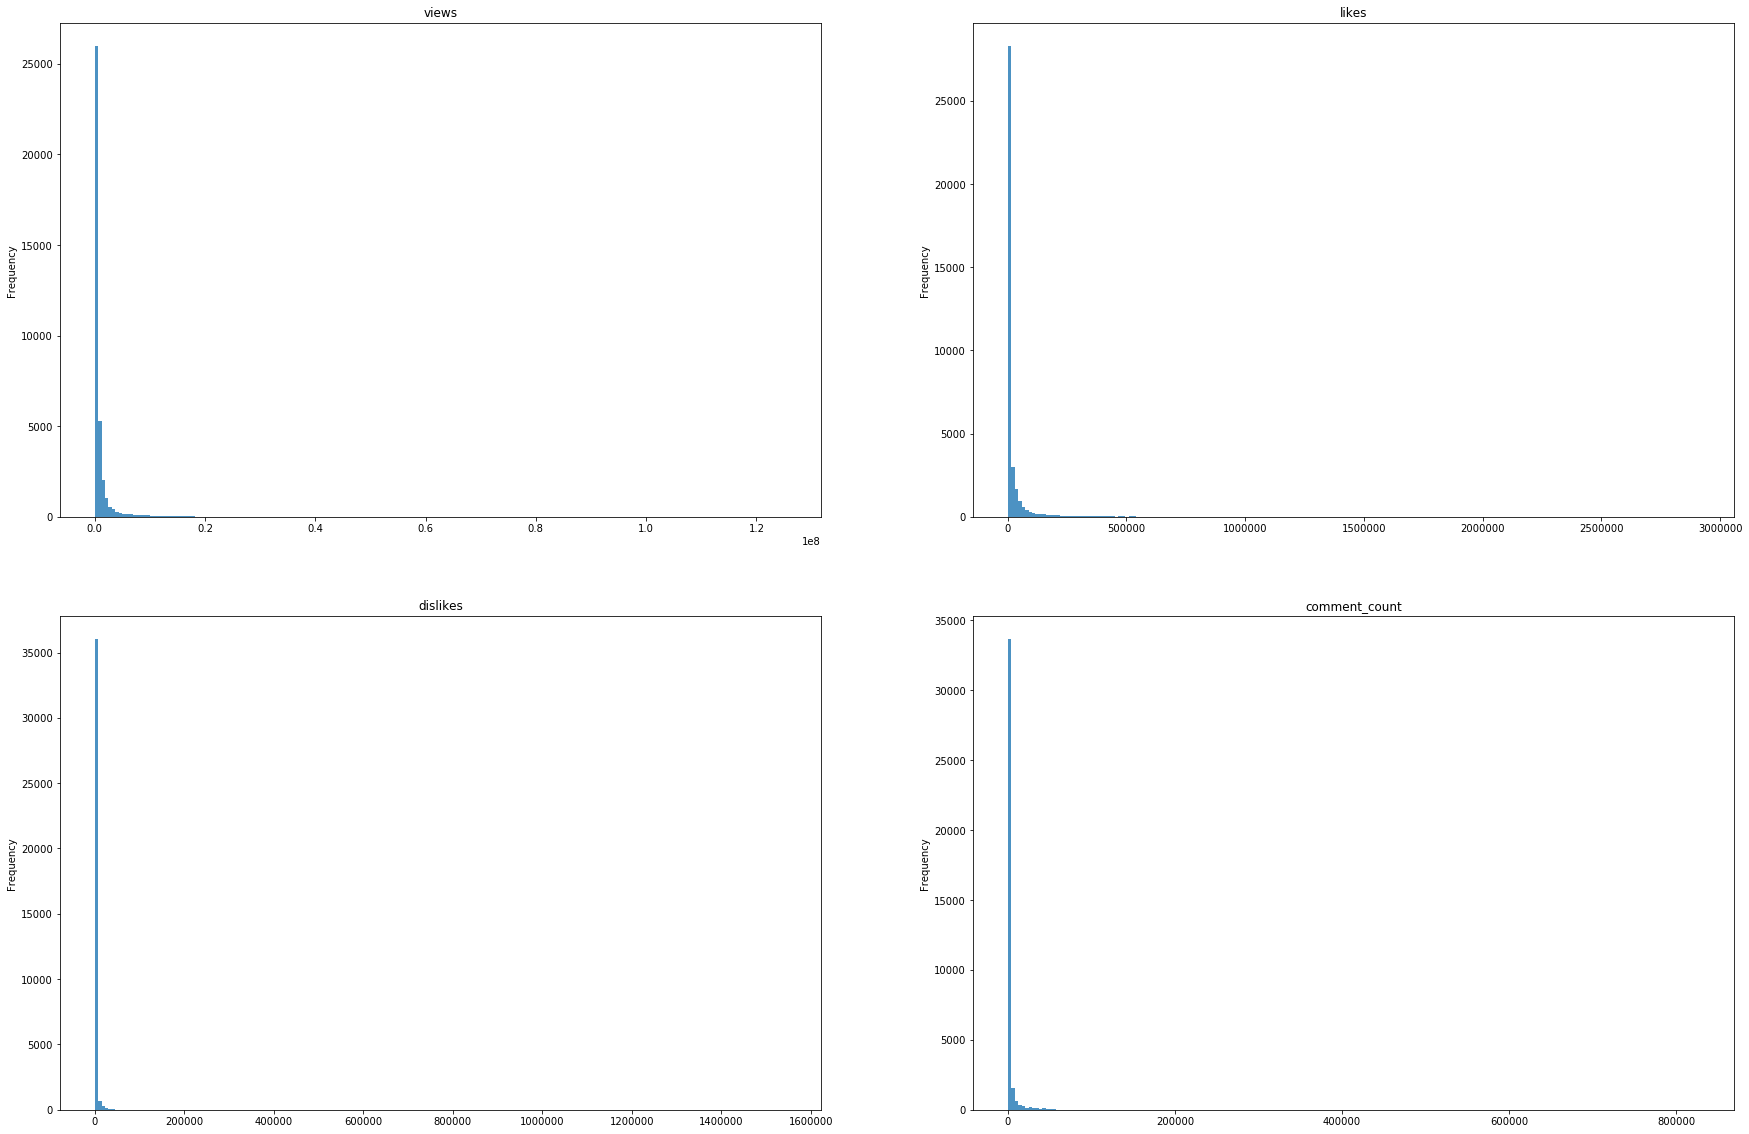

在FRvideos数据中：


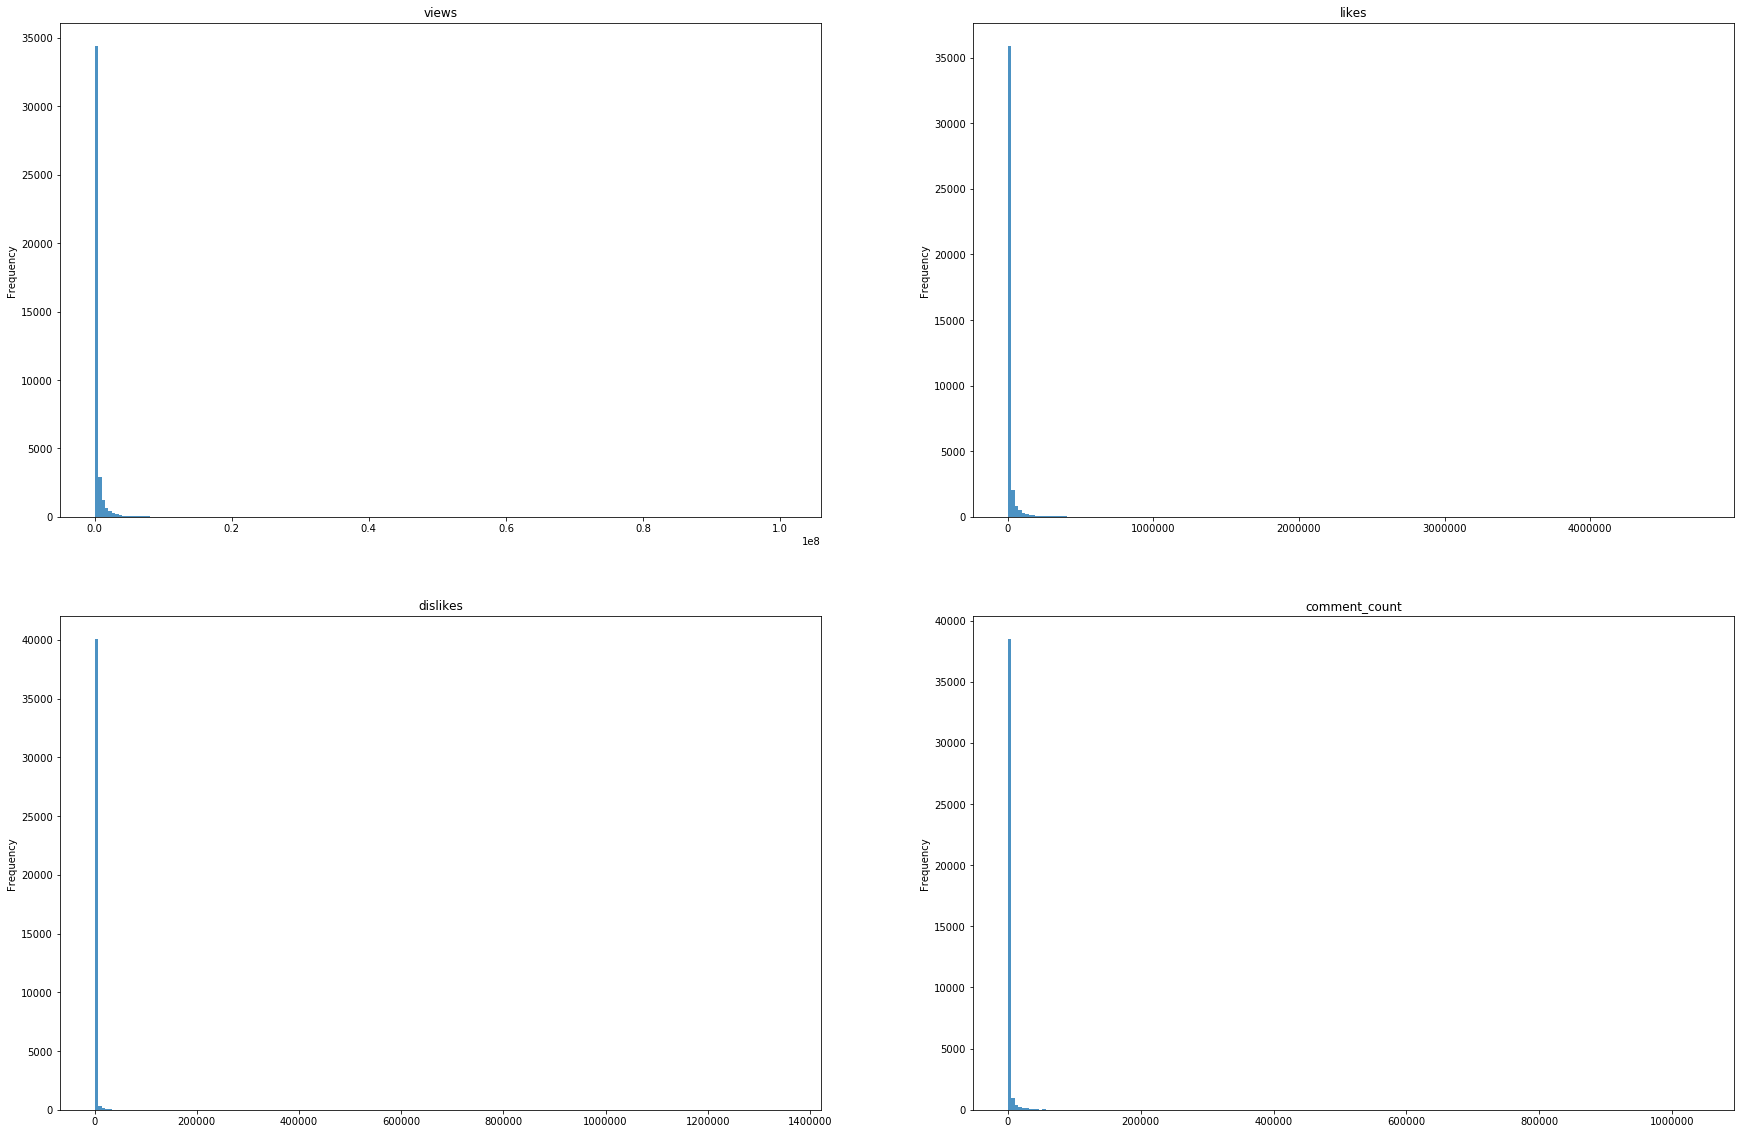

In [13]:
# 函数调用
numeric_attributes_hist(file_path, numeric_attributes)

In [14]:
# 数据可视化方法：盒图，通过盒图查看数值属性数据的分布及离群点
def numeric_attributes_hist(file_path, numeric_attributes, figsize=(15, 45)):
    file_list = os.listdir(file_path)
    for file in file_list:
        df = pd.read_csv(file_path + file)
        print("在{}数据中：".format(file[:-4]))
        for i, column in enumerate(numeric_attributes):
            plt.subplot(2, 2, i + 1)
            df[column].plot.box(figsize=figsize)
        plt.show()

在USvideos数据中：


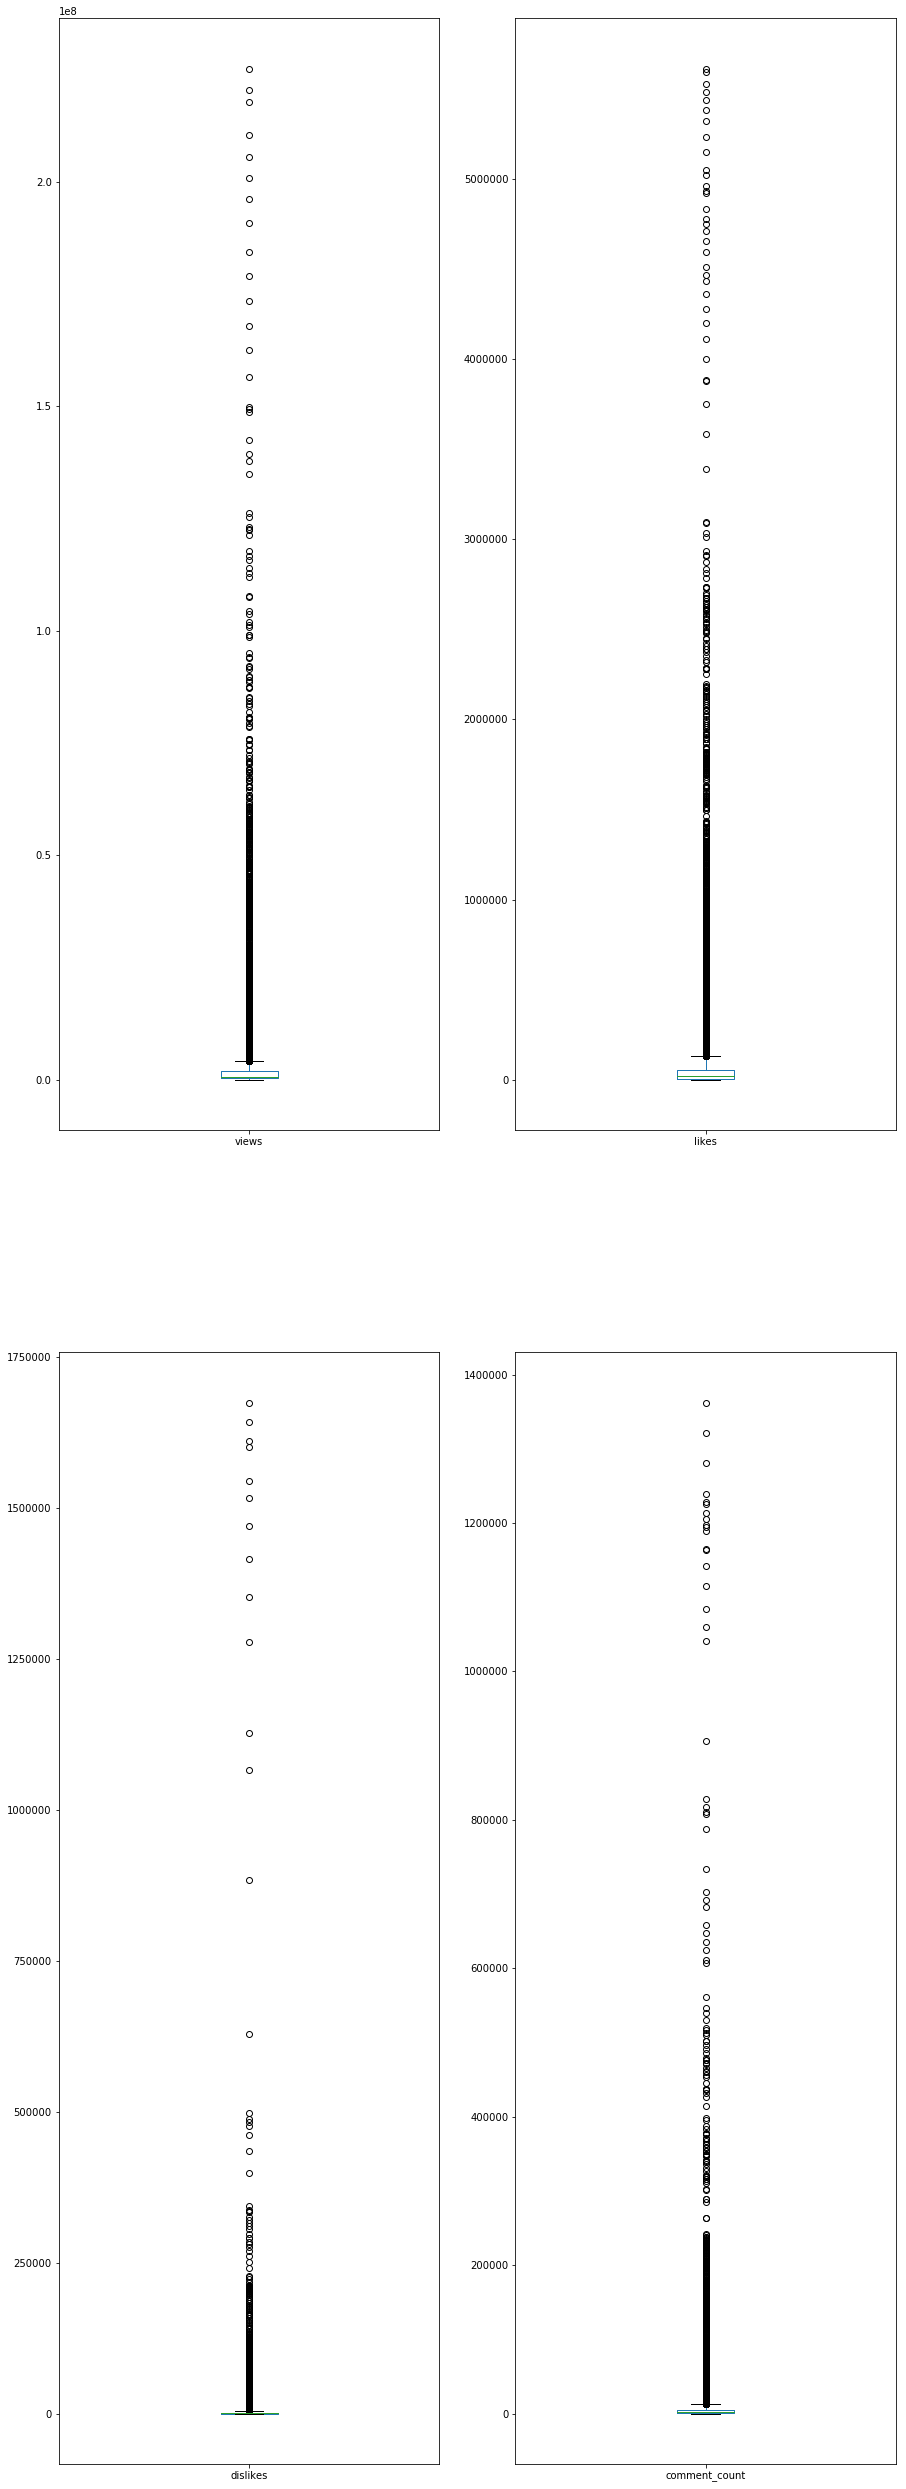

在DEvideos数据中：


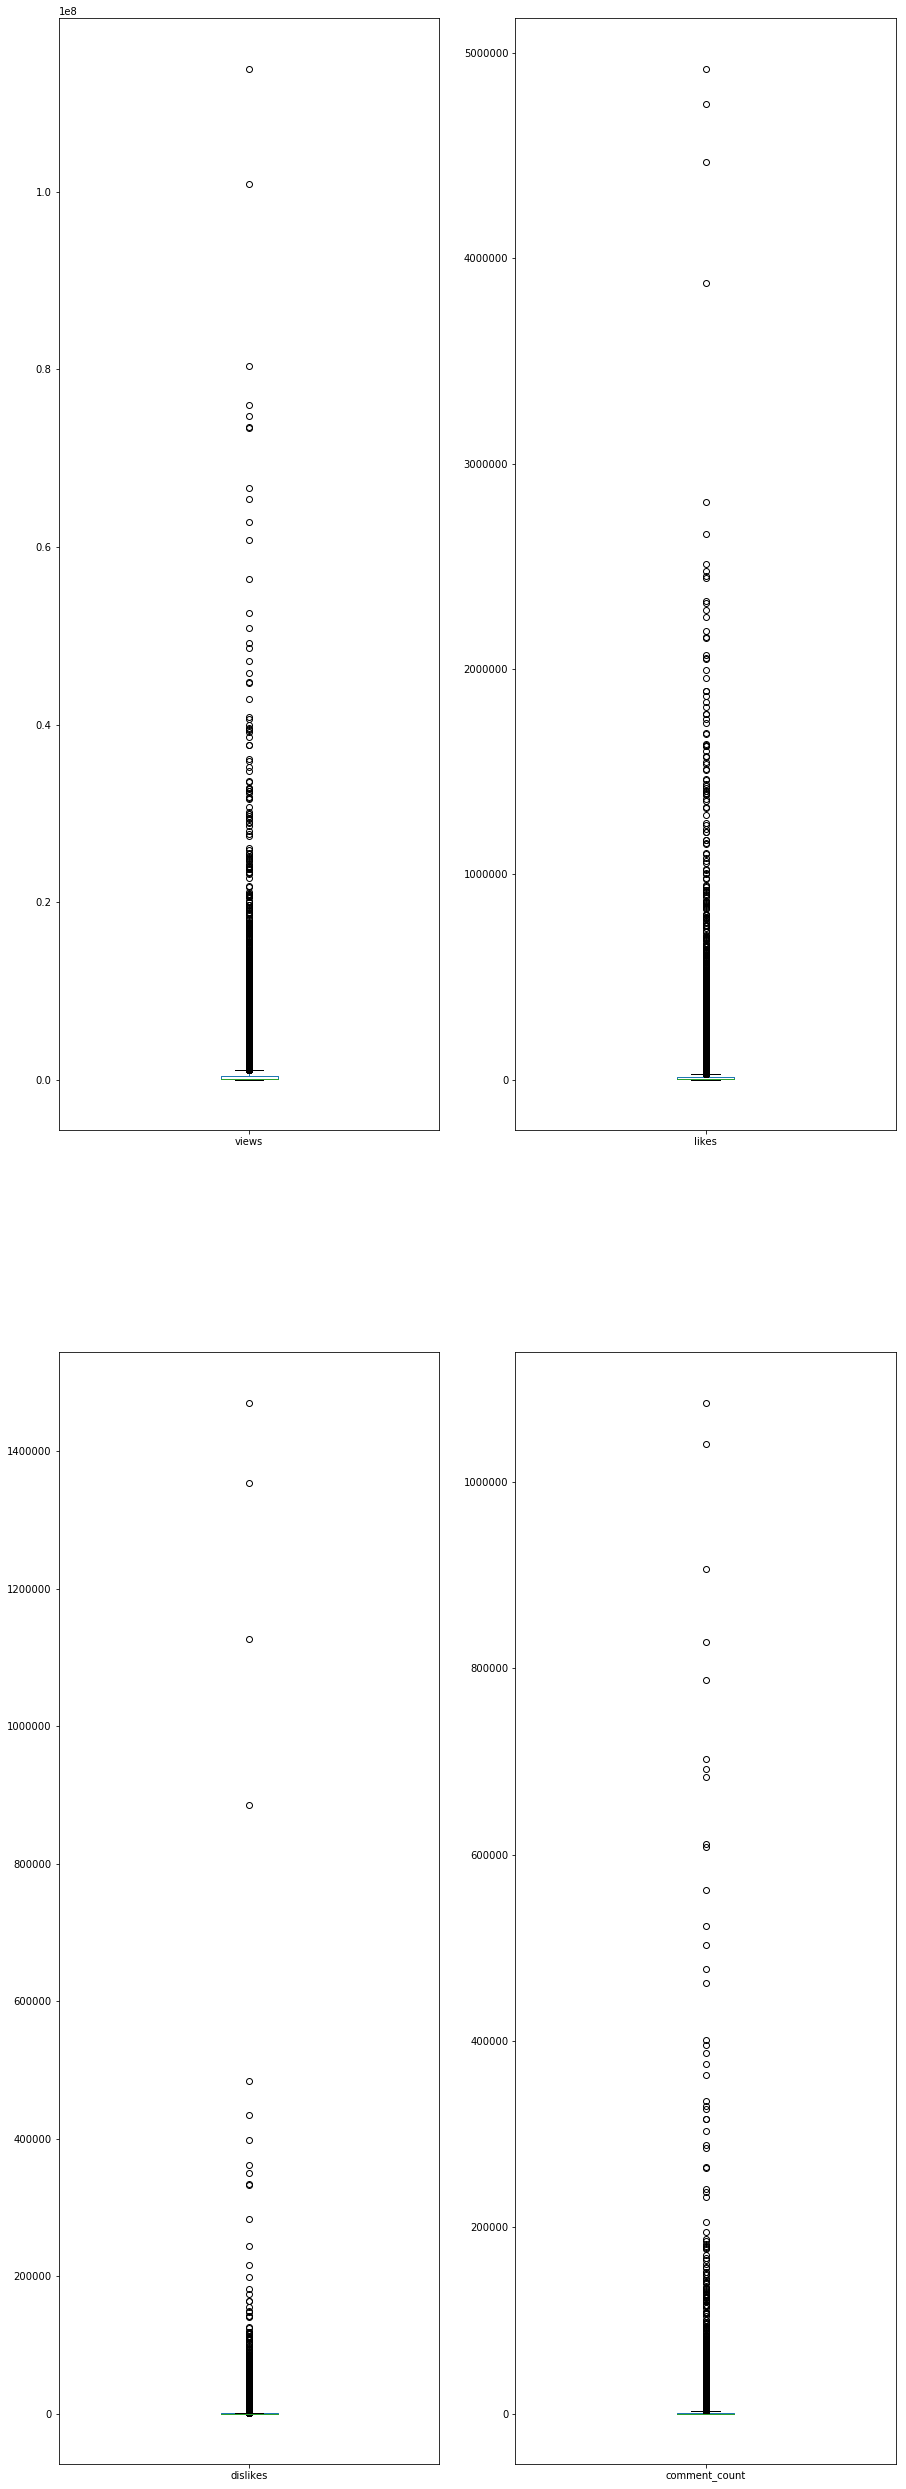

在GBvideos数据中：


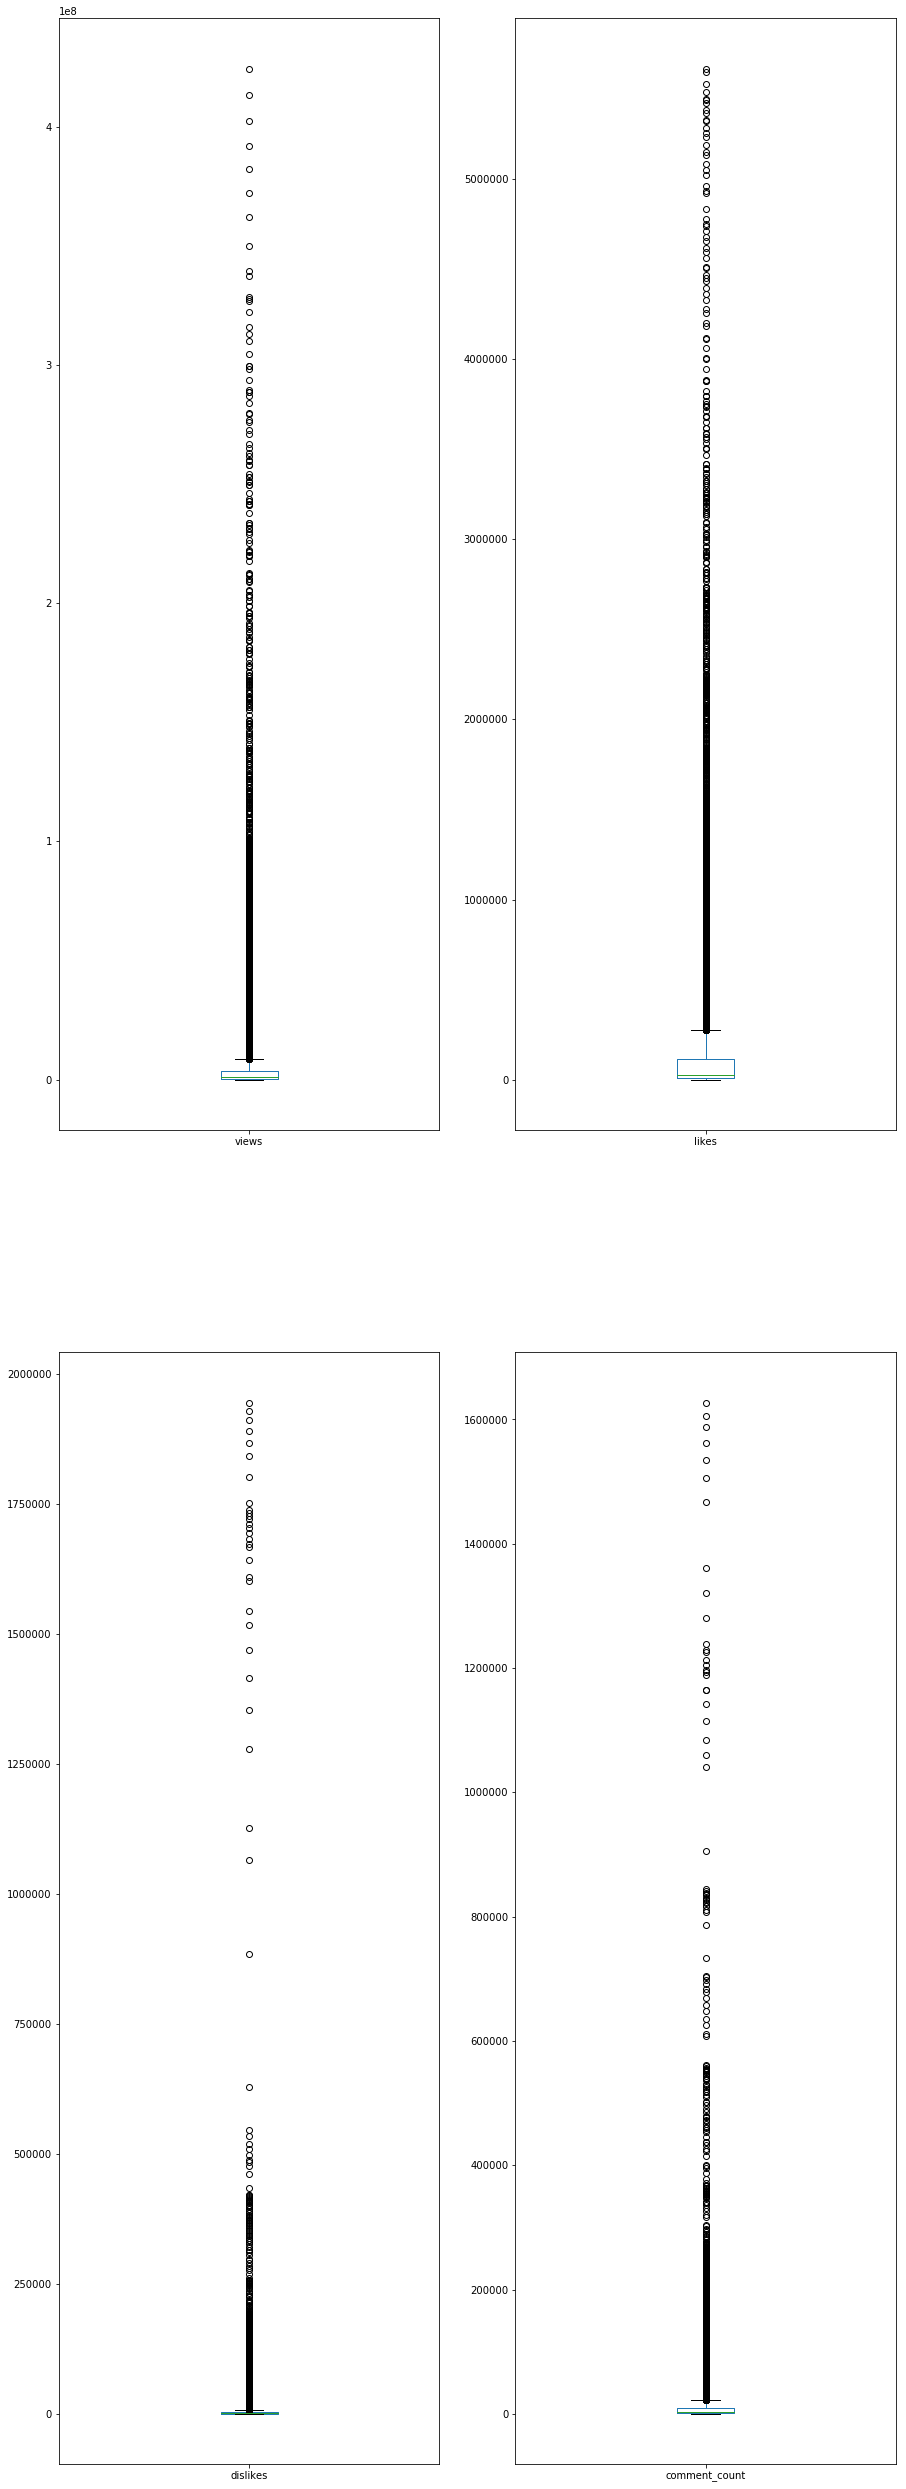

在CAvideos数据中：


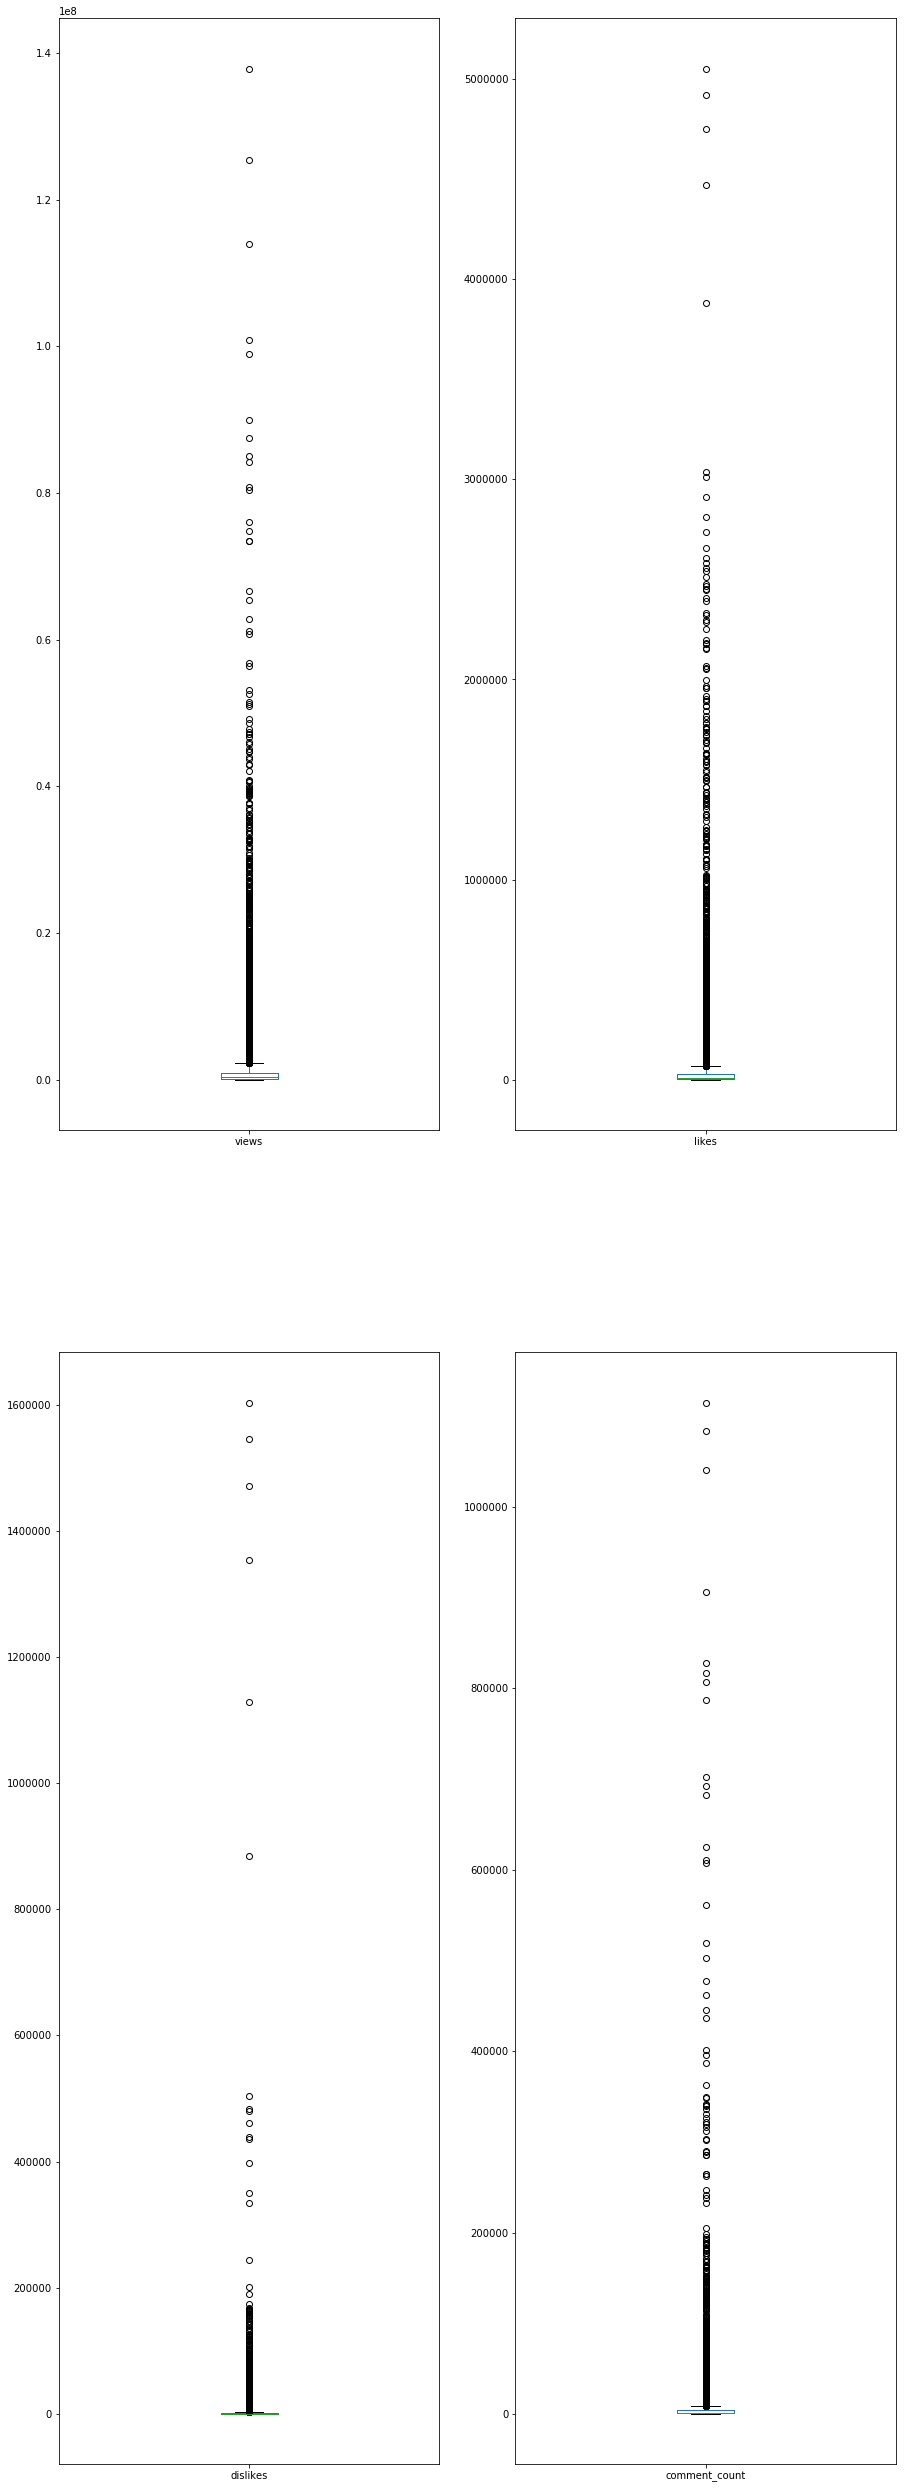

在INvideos数据中：


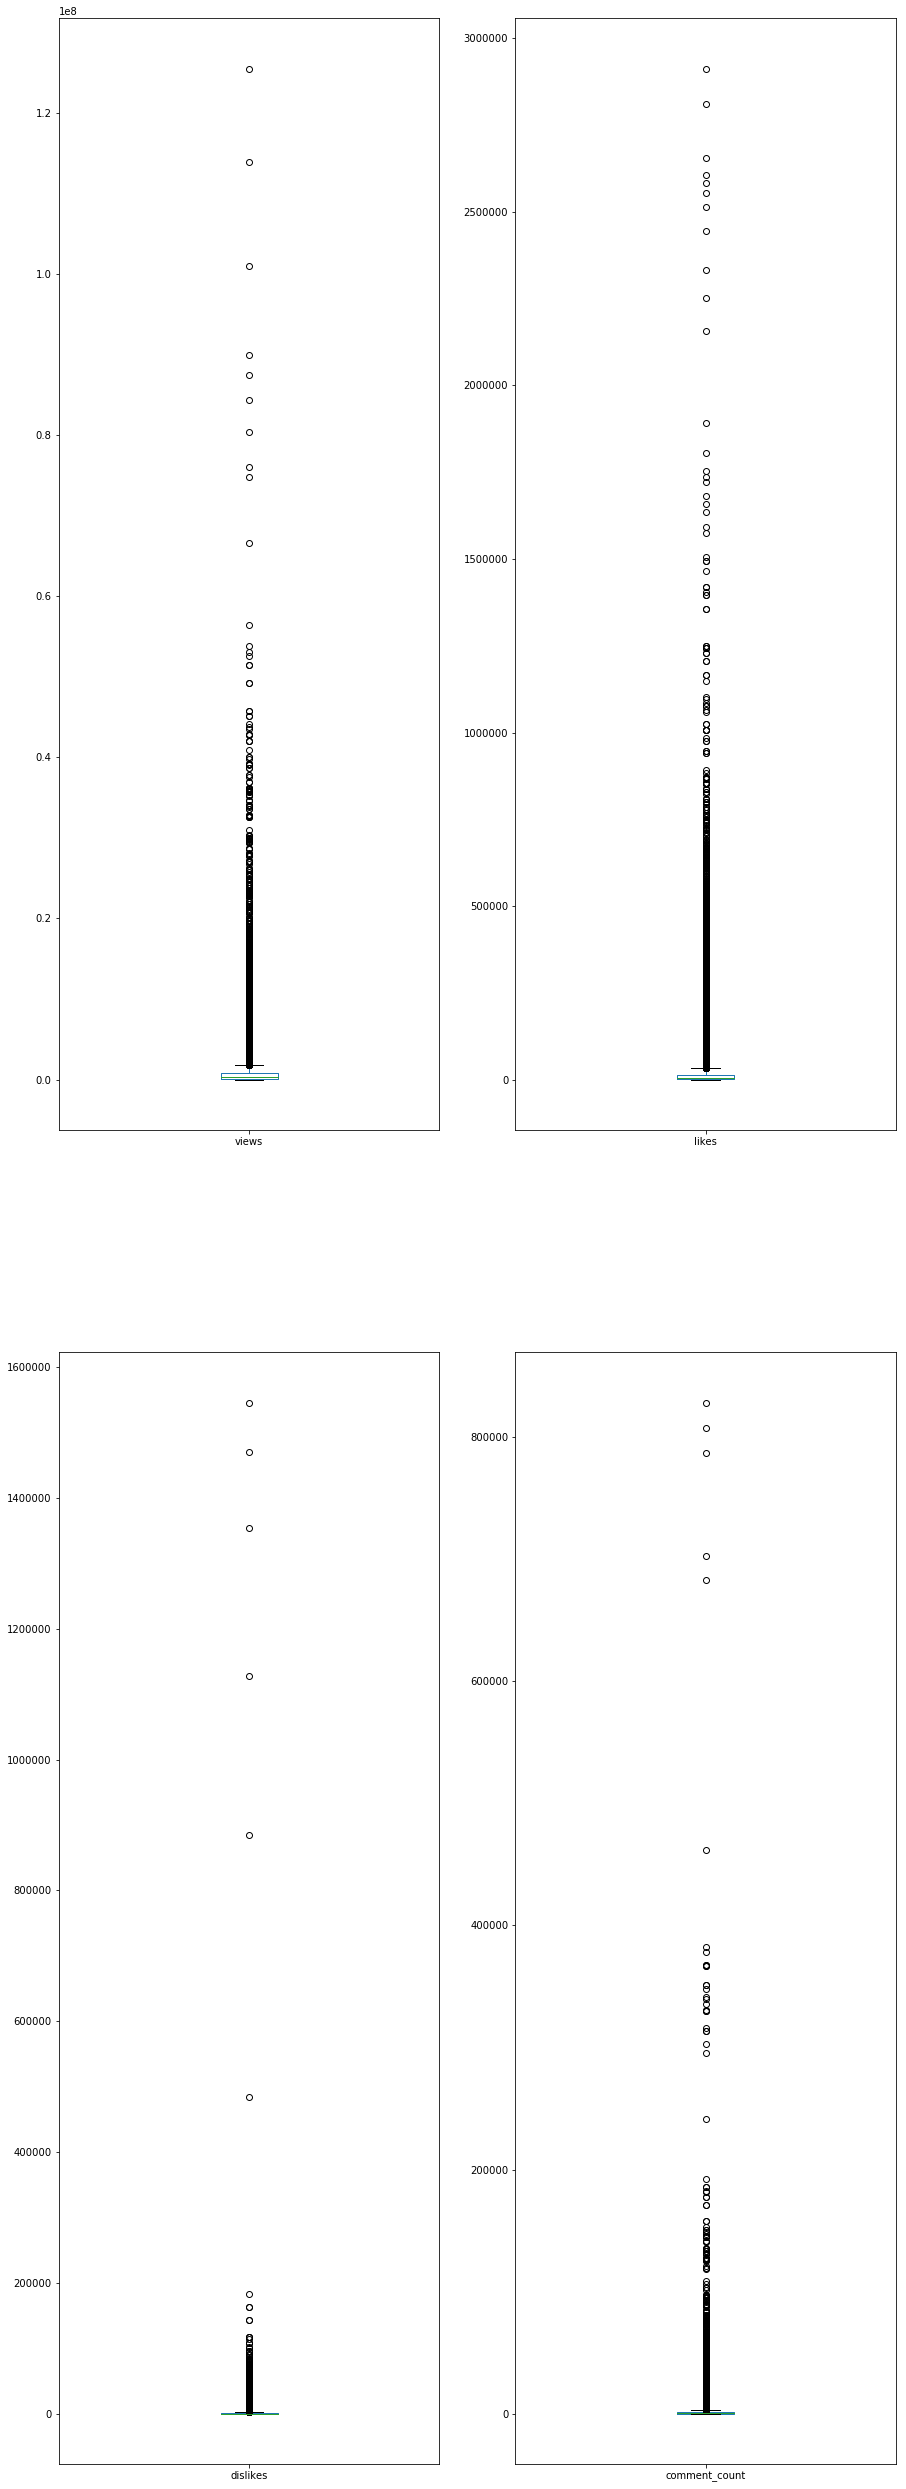

在FRvideos数据中：


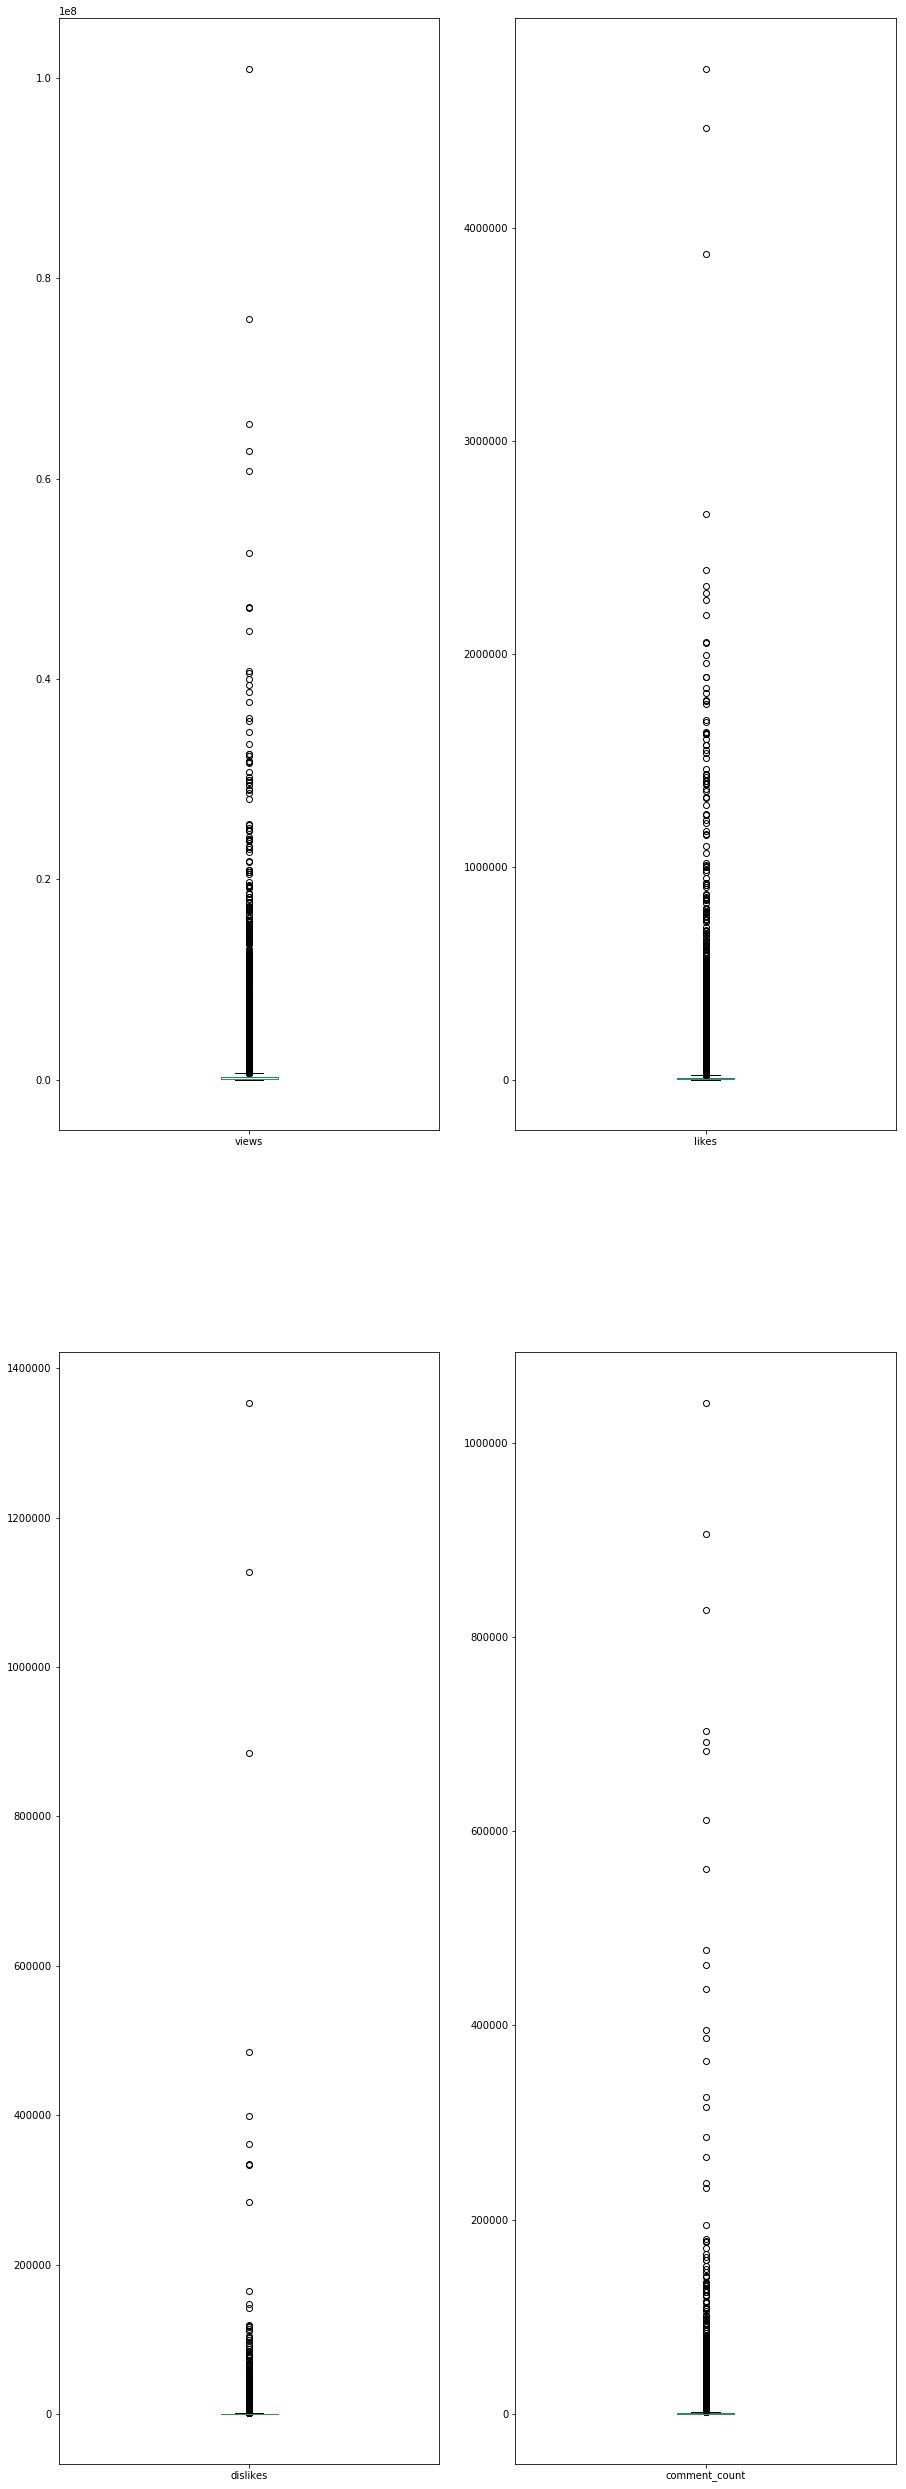

In [15]:
# 函数调用
numeric_attributes_hist(file_path, numeric_attributes)

### 3. 数据缺失的处理

In [16]:
# 查看缺失数据
def get_all_attributes_nan(file_path):
    file_list = os.listdir(file_path)
    for file in file_list:
        df = pd.read_csv(file_path + file)
        print("在{}数据中：".format(file[:-4]))
        print(df.isnull().sum())
        print(50 * '-')

In [17]:
# 函数调用
get_all_attributes_nan(file_path)

在USvideos数据中：
video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64
--------------------------------------------------
在DEvideos数据中：
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled         

通过查看数据中所有属性值缺失情况，得出数据中只有description数据存在缺失，缺失原因可能是上传视频时用户没有添加description信息。

description是文本数据，若对该列数据提取特征会涉及到nlp知识，非本课程数据挖掘任务，因此上述所有数据都无需对缺失数据填充。